# Genre predictions

In [1]:
import spotipy as sp
import spotipy.util as util
import pandas as pd
import json
import time
import requests as re
from spotipy import oauth2
import regex
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Obtaining an authentication token for the spotify API ututilizing spotipy, a python wrapper
token = util.prompt_for_user_token(username='u76krgcu2i52isp9ktf2acmmp', 
                           scope='user-library-read',
                           client_id='71f8b6e1b36740a8acda7e15c5e1d73d',
                           client_secret='ebb9411ac7f5455a9cbb752dbb7e4f9f',
                           redirect_uri='https://example.com/callbacks')

In [3]:
# Creating a spotipy object called spot
spot= sp.Spotify(auth=token)


In [4]:
# Checking to see if I am connected to spotify API by getting genre seeds
genres = pd.DataFrame(spot.recommendation_genre_seeds())
genres.genres.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova',
       'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house',
       'children', 'chill', 'classical', 'club', 'comedy', 'country',
       'dance', 'dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub',
       'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro',
       'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays',
       'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop',
       'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock',
       'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop',
       'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies',
       'mpb', 'new-age', 'new-releas

In [14]:
#List of artist's name on spotify obtained from kaggle
artist_list = pd.read_csv('./artist-uris.csv.csv', header=None) 

In [15]:
# cleaning dataframe, drop nulls and nonessetial columns
artist_list.dropna(axis=0, inplace=True)

In [16]:
artist_list.isnull().sum()

0    0
1    0
dtype: int64

In [17]:
artist_list.rename(columns={0:'artist', 1:'id'}, inplace=True)

In [18]:
artist_list.loc[5555]

artist                        Basslovers United
id        spotify:artist:4KpgeSLtjj0txr6drzaedu
Name: 5555, dtype: object

In [19]:
artist_list.tail()

,artist,id
81318,黃曉明,spotify:artist:53F8atvCmVFVOvnKwZXBd3
81319,黃玠瑋,spotify:artist:6VI0p0xTjBKKxQN8i8vGpD
81320,黃義達,spotify:artist:7kaq0LysuRSgBZSorlZ7Vj
81321,黃顯忠 (Huang Xianzhong),spotify:artist:7MuuEryyseo5cvReO6gdPF
81322,#ERROR!,spotify:artist:1easDqNuXyccZdonMosEiU


In [20]:
#Example of a spotipy search object, output is a dictionary
results_t = spot.search(q='Michael-Jackson',limit=1, type='track')



{'artists': {'href': 'https://api.spotify.com/v1/search?query=Basslovers+United&type=artist&market=US&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4KpgeSLtjj0txr6drzaedu'},
    'followers': {'href': None, 'total': 14103},
    'genres': ['eurodance', 'hands up', 'pop house'],
    'href': 'https://api.spotify.com/v1/artists/4KpgeSLtjj0txr6drzaedu',
    'id': '4KpgeSLtjj0txr6drzaedu',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/6b87f7afea8928a01ec68205fc6cd81112cf77af',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/2107e939259392abc487e98984b99af980df039e',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/3bf8444d07470e633f33f1b5f823c5b106a40979',
      'width': 160}],
    'name': 'Basslovers United',
    'popularity': 47,
    'type': 'artist',
    'uri': 'spotify:artist:4KpgeSLtjj0txr6drzaedu'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/sea

# Pulling Data

In [21]:

#pulled data 35 times, try and except methods were utilizzed to avoid list indicie errors.
infos_36 = []
for i in artist_list['id'][81320:]:
    sp.max_get_retries = len(artist_list['id'])
    
    
    info = {}
    
    try:
        artist_name = spot.artist(i)['name']
        results_t = spot.search(q= artist_name,limit=1, type='track')
        results_a = spot.search(q=artist_name, limit=1, type='artist' )
        track_id = results_t['tracks']['items'][0]['id']
        track_name = results_t['tracks']['items'][0]['name']
        genres = results_a['artists']['items'][0]['genres']
        aud_feat = spot.audio_features(track_id)  # look for track id's, think about appending a bunch of track ids to a list
        danceability = aud_feat[0]['danceability']
        energy = aud_feat[0]['energy']
        loudness = aud_feat[0]['loudness']
        key = aud_feat[0]['key']
        mode = aud_feat[0]['mode']
        speechiness = aud_feat[0]['speechiness']
        acousticness = aud_feat[0]['acousticness']
        instrumentalness = aud_feat[0]['instrumentalness']
        liveness = aud_feat[0]['liveness']
        valence = aud_feat[0]['valence']
        tempo = aud_feat[0]['tempo']
        time_signature = aud_feat[0]['time_signature']
        artist_uri = results_t['tracks']['items'][0]['album']['artists'][0]['uri']
        popularity = results_t['tracks']['items'][0]['popularity']
    except:
        'list index out of range'
    if genres != []:
        print(artist_name)
        info['artist_name'] = artist_name
        info['track_id'] = track_id
        info['track_name'] = track_name
        info['genre'] = genres
        info['danceability'] = danceability
        info['energy'] = energy
        info['loudness'] = loudness
        info['key'] = key
        info['mode'] = mode
        info['speechiness'] = speechiness
        info['acousticness'] = acousticness
        info['instrumentalness'] = instrumentalness
        info['liveness'] = liveness
        info['valence'] = valence
        info['tempo'] = tempo
        info['time_signature'] = time_signature
        info['artist_uri'] = artist_uri
        info['popularity'] = popularity
        
        infos_36.append(info)
    time.sleep(1)

In [22]:
#info_1 = pd.DataFrame(infos)
#info_1.to_csv('./info_1.csv')
#info_2 = pd.DataFrame(infos_2)
#info_2.to_csv('./info_2.csv')

In [23]:
infos_36

[]

In [24]:
#saved data 35 times
info_36 = pd.DataFrame(infos_36)
info_36.to_csv('./info_36.csv')

In [25]:
artist_list[artist_list['artist'] == "黃義達"]

,artist,id
81320,黃義達,spotify:artist:7kaq0LysuRSgBZSorlZ7Vj


In [3]:
#Calling all the pulled data
info_1 = pd.read_csv('./info_1.csv')
info_2 = pd.read_csv('./info_2.csv')
info_3 = pd.read_csv('./info_3.csv')
info_4 = pd.read_csv('./info_4.csv')
info_5 = pd.read_csv('./info_5.csv')
info_6 = pd.read_csv('./info_6.csv')
info_7 = pd.read_csv('./info_7.csv')
info_8 = pd.read_csv('./info_8.csv')
info_9 = pd.read_csv('./info_9.csv')
info_10 = pd.read_csv('./info_10.csv')
info_11 = pd.read_csv('./info_11.csv')
info_12 = pd.read_csv('./info_12.csv')
info_13 = pd.read_csv('./info_13.csv')
info_14 = pd.read_csv('./info_14.csv')
info_15 = pd.read_csv('./info_15.csv')
info_16 = pd.read_csv('./info_16.csv')
info_17 = pd.read_csv('./info_17.csv')
info_18 = pd.read_csv('./info_18.csv')
info_19 = pd.read_csv('./info_19.csv')
info_20 = pd.read_csv('./info_20.csv')
info_21 = pd.read_csv('./info_21.csv')
info_22 = pd.read_csv('./info_22.csv')
info_23 = pd.read_csv('./info_23.csv')
info_24 = pd.read_csv('./info_24.csv')
info_25 = pd.read_csv('./info_25.csv')
info_26 = pd.read_csv('./info_26.csv')
info_27 = pd.read_csv('./info_27.csv')
info_28 = pd.read_csv('./info_28.csv')
info_29 = pd.read_csv('./info_29.csv')
info_30 = pd.read_csv('./info_30.csv')
info_31 = pd.read_csv('./info_31.csv')
info_32 = pd.read_csv('./info_32.csv')
info_33 = pd.read_csv('./info_33.csv')
info_34 = pd.read_csv('./info_34.csv')
info_35 = pd.read_csv('./info_35.csv')




In [4]:
info_9.head()

,Unnamed: 0,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence
0,0,0.775,Eric Bibb,spotify:artist:2uNcfNhlVJUyEX0t0NG1m1,0.735,0.214,"['acoustic blues', 'blues', 'country blues', '...",0.000011,3,0.1200,-11.193,0,33,0.0496,146.877,3,2Q52Da5pzizJ4I8j2McUAs,With My Maker I Am One,0.6220
1,1,0.746,Eric Buchholz,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,0.122,0.286,['scorecore'],0.938000,0,0.1180,-14.274,1,39,0.0336,71.203,3,0zOWGP6OSqaGeG7sDrLO8A,Hero of Time,0.0391
2,2,0.440,Eric Burdon,spotify:artist:3miNucraVWk4hdVsIxn7id,0.847,0.459,"['blues-rock', 'british blues', 'classic rock'...",0.000000,2,0.0781,-11.793,0,49,0.0485,119.513,4,2nluoJKvE7rTBN7kve8dnr,Spill The Wine,0.9590
3,3,0.717,Eric Burdon & the Animals,spotify:artist:70tMW5bZT3TJUa1CWtfVkq,0.559,0.326,"['british invasion', 'classic rock', 'folk roc...",0.087600,4,0.1380,-13.508,0,34,0.0305,115.904,4,357XGtCYzQD8AgPazWHdUx,Good Times,0.5260
4,4,0.011,Eric Carmen,spotify:artist:2ekjTXgjxbWwBX5lTAj4DU,0.712,0.549,"['album rock', 'bubblegum pop', 'disco', 'folk...",0.000000,5,0.1180,-9.484,1,69,0.0254,109.882,4,31H6au3jhblhr6MMJiXnCq,Hungry Eyes,0.5520


In [184]:
frames = [info_1, info_2, info_3, info_4, info_5, info_6 ,info_7 ,info_8 ,info_9, info_10,
info_11 ,info_12 ,info_13,info_14 ,info_15 ,info_16 ,info_17 ,info_18 ,info_19 ,info_20, 
info_21 ,info_22 ,info_23 ,info_24 ,info_25 ,info_26 ,info_27 ,info_28 ,info_29 ,info_30,
info_31 ,info_32 ,info_33 ,info_34 ,info_35]

In [185]:
# All pulled data as one dataframe
df = pd.concat(frames, ignore_index=True,)

In [186]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [187]:
df.to_csv('./df.csv', index=False)

In [188]:
df = pd.read_csv('./df.csv')

In [189]:
#check for and remove duplicates
df.duplicated(keep='first').sum()

7756

In [190]:
46291 -7756

38535

In [191]:
df.shape

(46291, 18)

In [192]:
df.drop_duplicates(keep='first', inplace=True)

In [193]:
df.duplicated().sum()

0

In [194]:
#check for nulls
df.isnull().sum()

acousticness        0
artist_name         0
artist_uri          0
danceability        0
energy              0
genre               0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
time_signature      0
track_id            0
track_name          0
valence             0
dtype: int64

In [195]:
df.head()

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence
0,0.5710,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.001070,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677
1,0.1220,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.000000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235
2,0.2290,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.548000,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563
3,0.0375,2,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,0.703,0.696,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",0.000006,11,0.274,-5.482,1,98,0.0529,121.969,4,5SxkdsY1ufZzoq9iXceLw9,no tears left to cry,0.366
4,0.8830,3,spotify:artist:15UsOTVnJzReFVN1VCnxy4,0.610,0.258,"['alternative metal', 'canadian metal', 'canad...",0.014500,11,0.103,-12.758,1,81,0.0331,127.080,4,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.164


In [196]:
df.reset_index(drop=True,inplace=True)

# Binning Genres

In [434]:
#bin all genres into 12 genres using regex, if a genre does not fall into any category
# give it a NaN
def binning(df):
    for i in range(len(df)):
        if df['genre'].str.contains(r'pop|indie|a cappella|doo-wop|boy band|christmas|halloween').loc[i] == True:
            df['target'].loc[i] = 'pop'
        elif df['genre'].str.contains(r'rock|jam band|dreamo|screamo|emo|grunge|pixie|new wave|surf music').loc[i] == True:
            df['target'].loc[i] = 'rock'
        elif df['genre'].str.contains(r'jazz|swing|broadway|blues|r&b|fusion|disney|barbershop|hollywood|show tunes|ragtime|stride|big band| hard bop| post bop|cabaret').loc[i] == True:
            df['target'].loc[i] = 'jazz/blues'
        elif df['genre'].str.contains(r'metal|punk|djent|deathcore|hardcore|thrash').loc[i] == True:
            df['target'].loc[i] = 'hardcore'
        elif df['genre'].str.contains(r'dub|techno|electro|trance|house|step|turntablism|jack swing|edm|room|drum and bass|workout|otacore|glitch|vapor|eurodance|hardstyle|wonky|rave').loc[i] == True:
            df['target'].loc[i] = 'dance'
        elif df['genre'].str.contains(r'country|folk|bluegrass|nursery|americana|western|hawaiian|zydeco|zouk|redneck|children|lift kit').loc[i] == True:
            df['target'].loc[i] = 'country, folk'
        elif df['genre'].str.contains(r'rap|hip hop|lo-fi|chillhop|trip hop|drill|downtempo').loc[i] == True:
            df['target'].loc[i] = 'rap/hip hop'
        elif df['genre'].str.contains(r'classical|romantic|opera|orchestra|movie|baroque|piano|choral|wind ensemble|string quartet| video game|soundtrack|fingerstyle|chiptune|epicore|violin|flamenco|filmi|marching').loc[i] == True:
            df['target'].loc[i] = 'classical'
        elif df['genre'].str.contains(r'funk|soul|disco|reggae|afropop|azontobeats|ska|opm|soca').loc[i] == True:
            df['target'].loc[i] = 'old school dance'
        elif df['genre'].str.contains(r'mexican|tejano|norteno|cumbia|banda|mariachi|reggaeton|urbano|latin christian|bossa|bolero|salsa|cubaton|rumba|boogaloo').loc[i] == True:
            df['target'].loc[i] ='mexicano/latino'
        elif df['genre'].str.contains(r'gospel|worship|praise').loc[i] == True:
            df['target'].loc[i] = 'gospel/worship'
        elif df['genre'].str.contains(r'focus|sleep|relax|mellow|ambient|chill lounge|meditation').loc[i] == True:
            df['target'].loc[i] = 'focus/sleep'
        else:
            df['target'].loc[i] = np.NAN
binning(df)
    

/Users/scottsanowitz/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [452]:
df.shape

(38535, 19)

In [450]:
# check for and get rid of nulls (songs that did not fall into any of the 12 genres)
df.isnull().sum()

acousticness           0
artist_name            0
artist_uri             0
danceability           0
energy                 0
genre                  0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
popularity             0
speechiness            0
tempo                  0
time_signature         0
track_id               0
track_name             0
valence                0
target              3486
dtype: int64

In [455]:
df.dropna(axis=0, inplace=True)

In [456]:
df.shape

(35049, 19)

In [457]:
# dataframe to perfrom EDA and modeling on
df.to_csv('./master.csv', index=False)

# EDA

In [107]:
df = pd.read_csv('./master.csv')

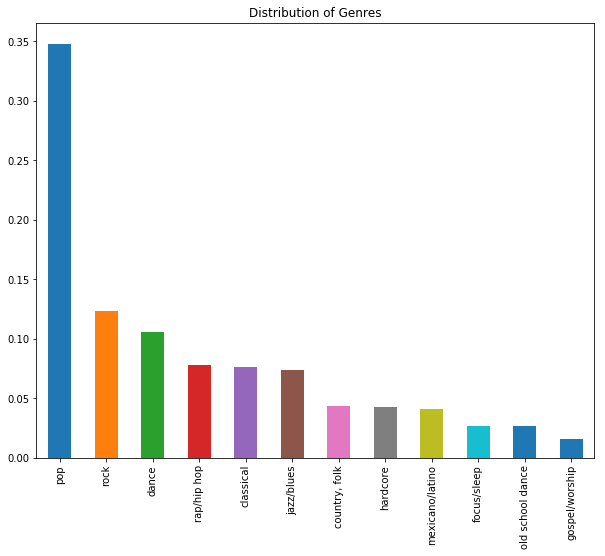

In [108]:
df.target.value_counts(normalize=True).plot(kind='bar', figsize=(10, 8), title='Distribution of Genres');

In [109]:
df.shape

(35049, 19)

In [110]:
df.head(3)

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target
0,0.571,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.00107,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677,old school dance
1,0.122,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.00000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235,rock
2,0.229,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.54800,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563,pop


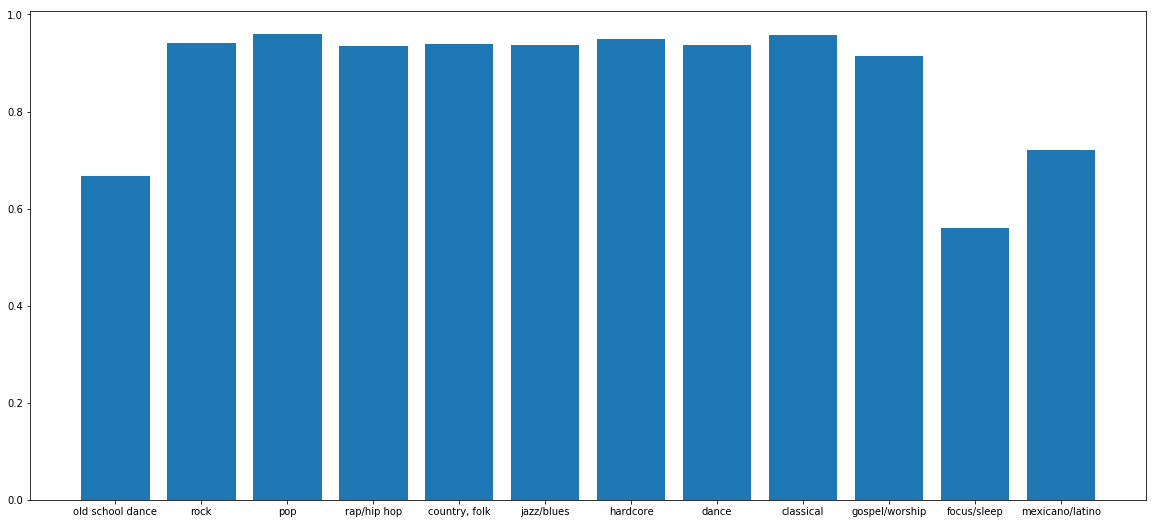

In [209]:
plt.figure(figsize=(20,9))
plt.bar(df.target, df.speechiness)
plt.tight_layout
plt.show();


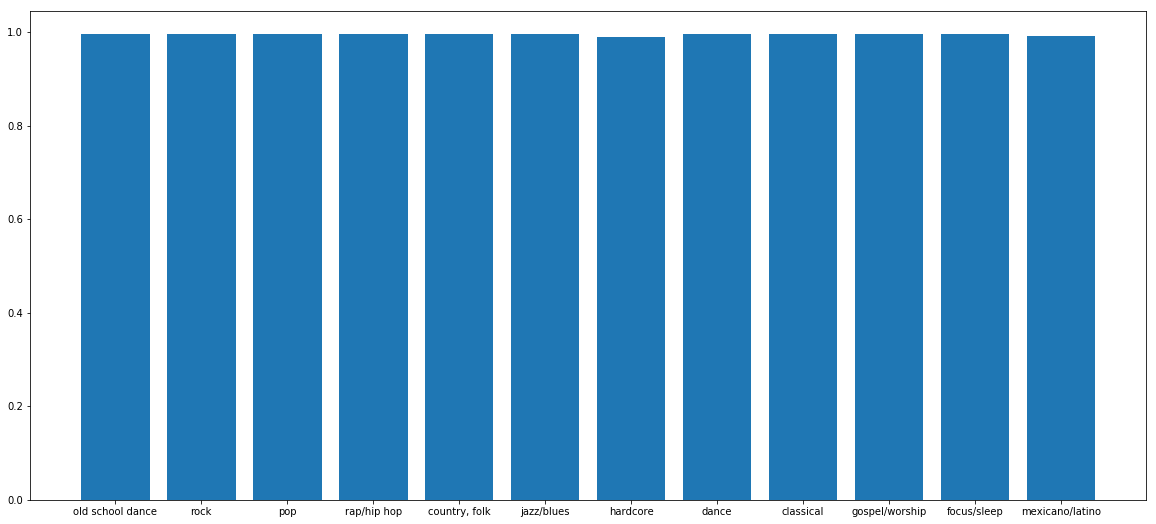

In [10]:
plt.figure(figsize=(20,9))
plt.bar(df.target, df.acousticness)
plt.tight_layout
plt.show();

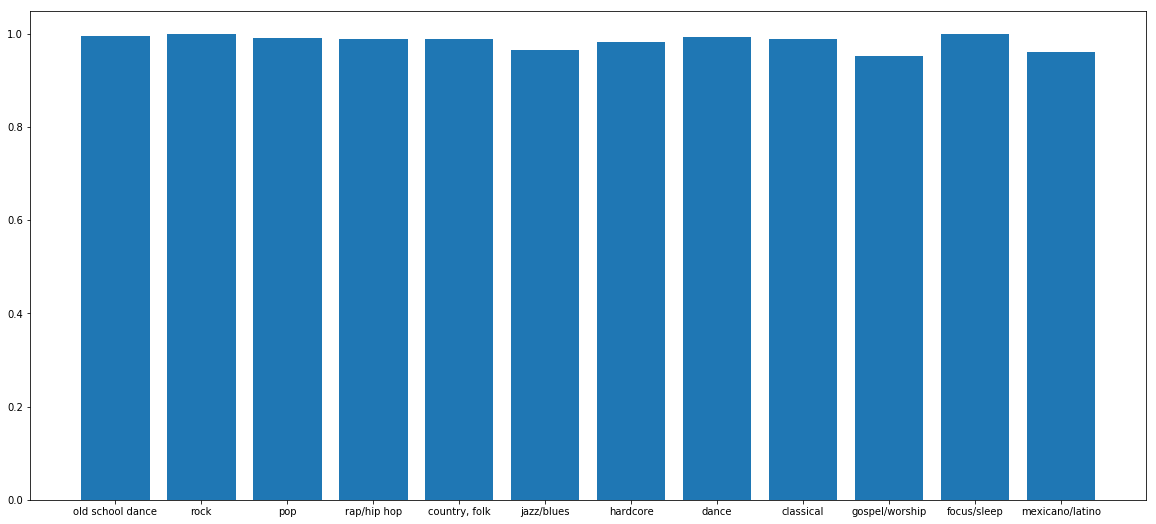

In [11]:
plt.figure(figsize=(20,9))
plt.bar(df.target, df.instrumentalness)
plt.tight_layout
plt.show();

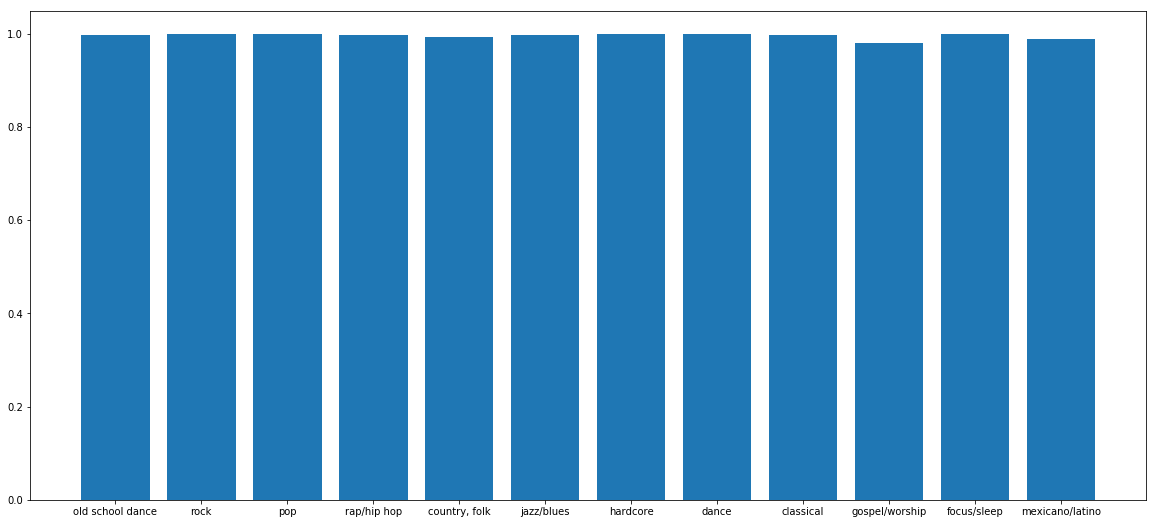

In [12]:
plt.figure(figsize=(20,9))
plt.bar(df.target, df.energy)
plt.tight_layout
plt.show();

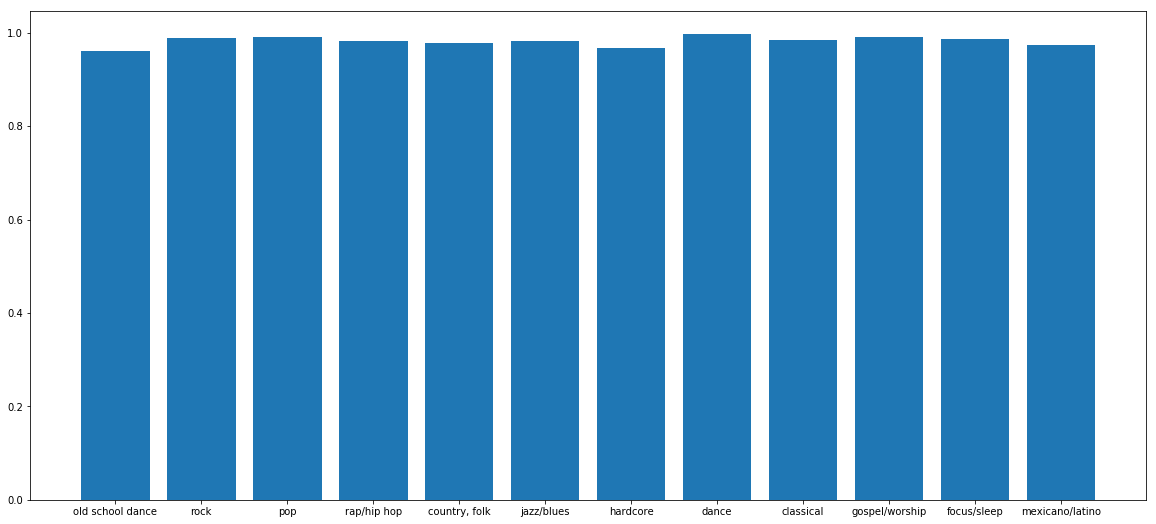

In [13]:
plt.figure(figsize=(20,9))
plt.bar(df.target, df.liveness)
plt.tight_layout
plt.show();

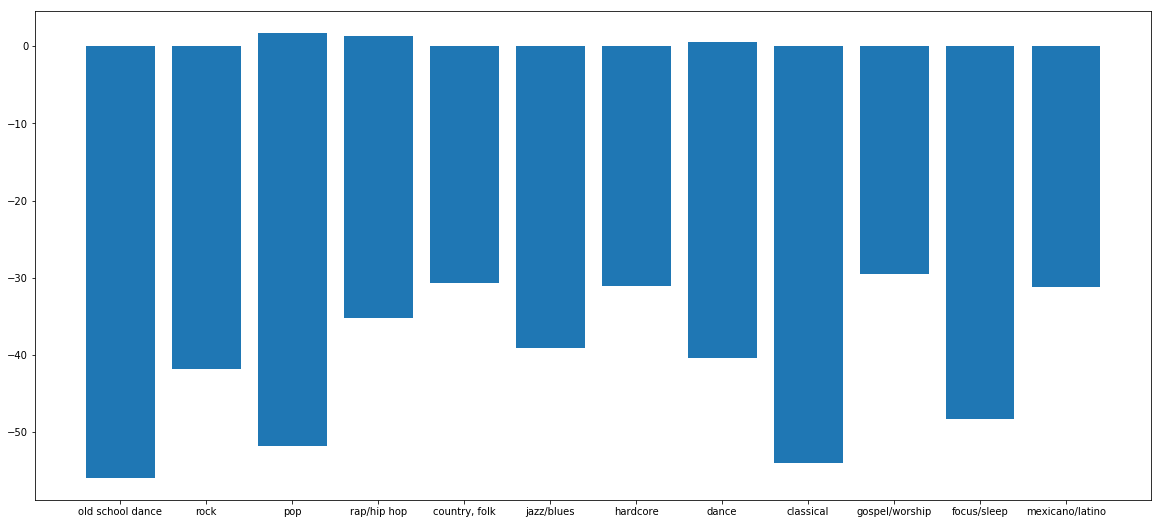

In [14]:
plt.figure(figsize=(20,9))
plt.bar(df.target,df.loudness)
plt.tight_layout
plt.show();

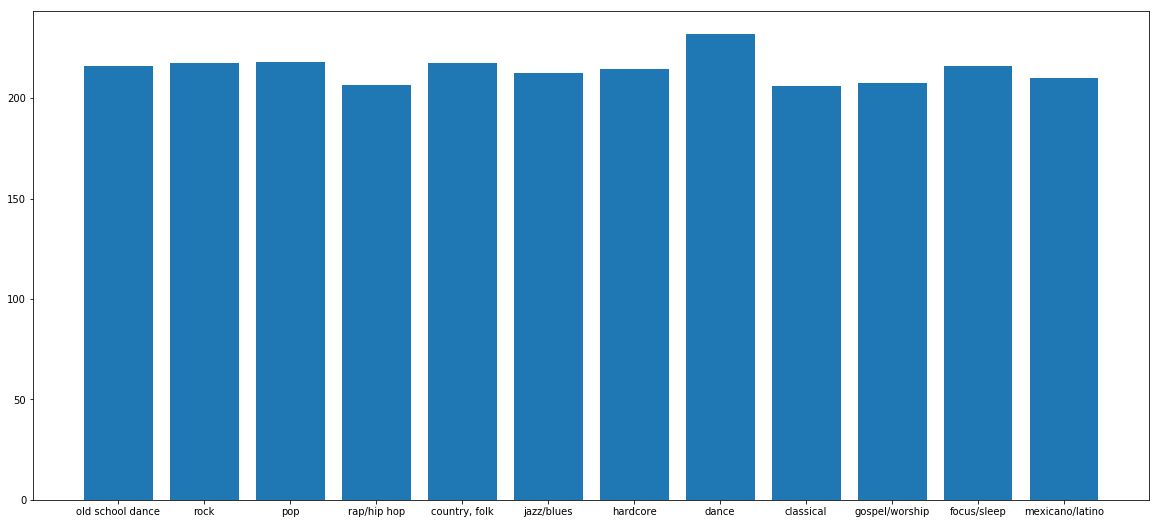

In [15]:
plt.figure(figsize=(20,9))
plt.bar(df.target,df.tempo)
plt.tight_layout
plt.show();

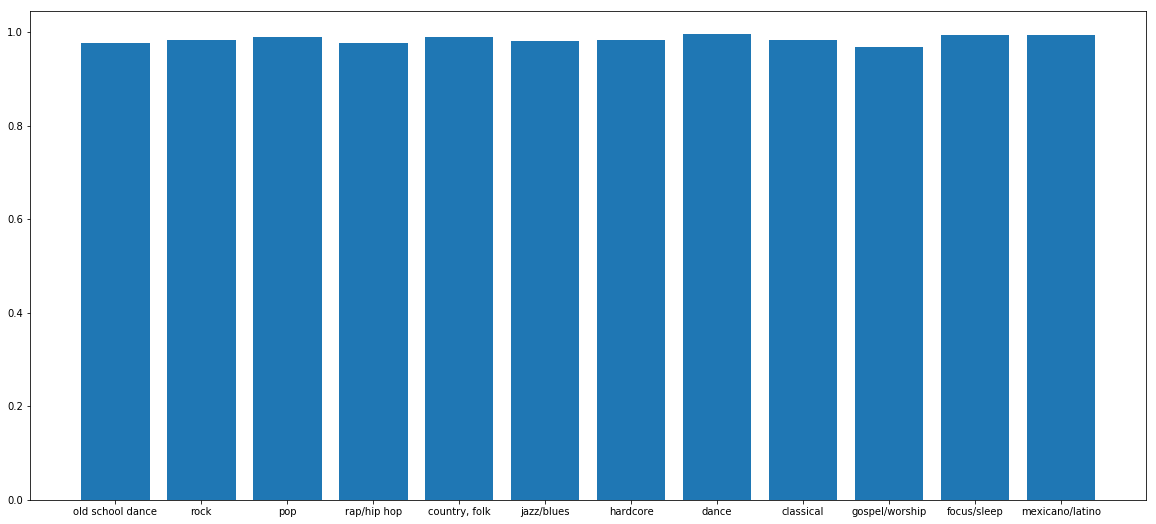

In [16]:
plt.figure(figsize=(20,9))
plt.bar(df.target,df.valence)
plt.tight_layout
plt.show();

In [330]:
(df.time_signature == 0).sum() # think about this

70

In [18]:
df.time_signature.value_counts()

4    31137
3     2972
5      535
1      335
0       70
Name: time_signature, dtype: int64

In [169]:
(df.tempo == 0).sum()

68

In [19]:
df['mode'].value_counts()

1    22225
0    12824
Name: mode, dtype: int64

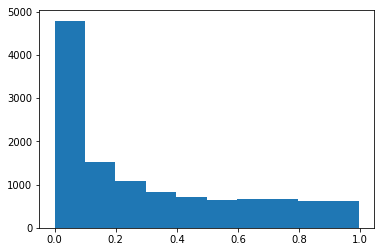

In [20]:
plt.hist(df[df.target=='pop'].acousticness);

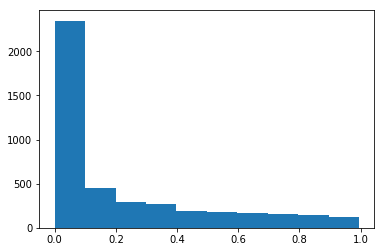

In [21]:
plt.hist(df[df.target=='rock'].acousticness);

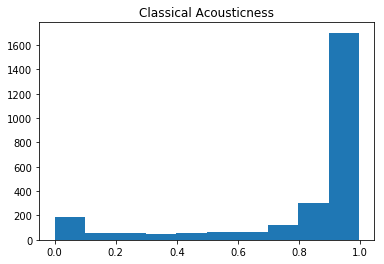

In [79]:
plt.title('Classical Acousticness')
plt.hist(df[df.target=='classical'].acousticness);

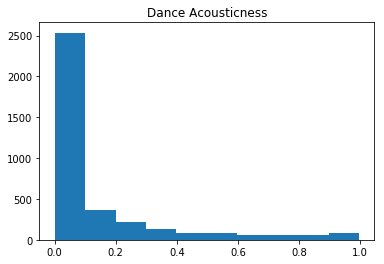

In [80]:
plt.title('Dance Acousticness')
plt.hist(df[df.target=='dance'].acousticness);

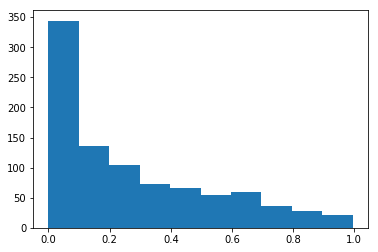

In [24]:
plt.hist(df[df.target=='old school dance'].acousticness);

In [25]:
df.target.unique()

array(['old school dance', 'rock', 'pop', 'rap/hip hop', 'country, folk',
       'jazz/blues', 'hardcore', 'dance', 'classical', 'gospel/worship',
       'focus/sleep', 'mexicano/latino'], dtype=object)

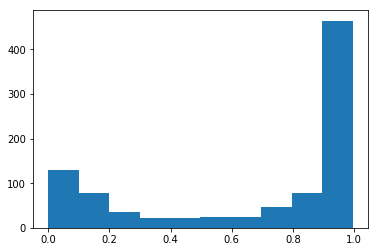

In [26]:
plt.hist(df[df.target=='focus/sleep'].acousticness);

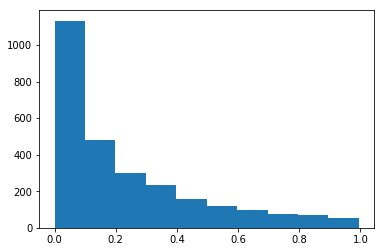

In [27]:
plt.hist(df[df.target=='rap/hip hop'].acousticness);

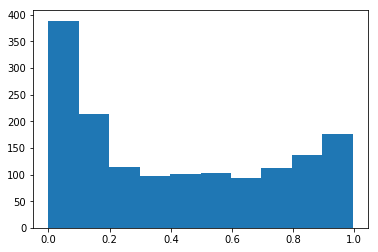

In [28]:
plt.hist(df[df.target=='country, folk'].acousticness);

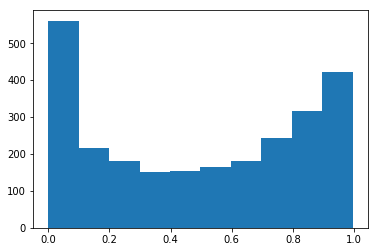

In [29]:
plt.hist(df[df.target=='jazz/blues'].acousticness);

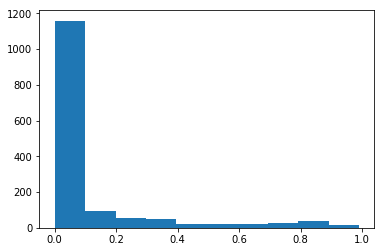

In [30]:
plt.hist(df[df.target=='hardcore'].acousticness);

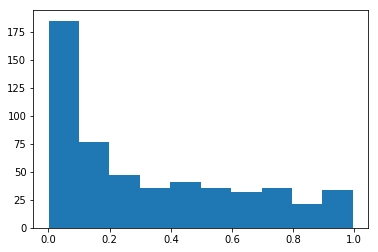

In [31]:
plt.hist(df[df.target=='gospel/worship'].acousticness);

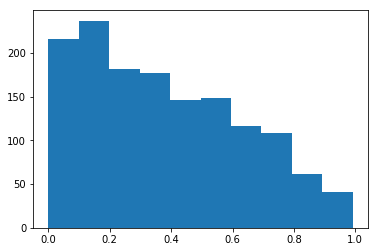

In [32]:
plt.hist(df[df.target=='mexicano/latino'].acousticness);

In [74]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


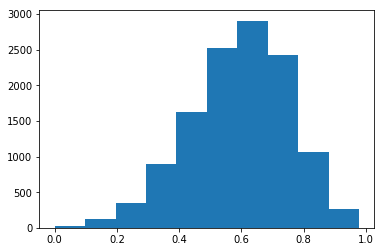

In [33]:
plt.hist(df[df.target=='pop'].danceability);

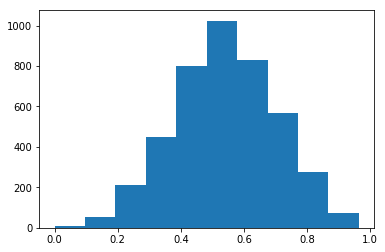

In [34]:
plt.hist(df[df.target=='rock'].danceability);

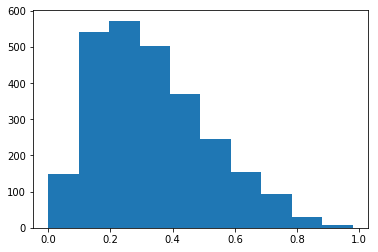

In [35]:
plt.hist(df[df.target=='classical'].danceability);

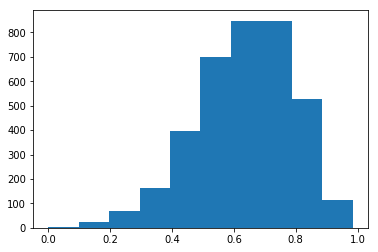

In [36]:
plt.hist(df[df.target=='dance'].danceability);

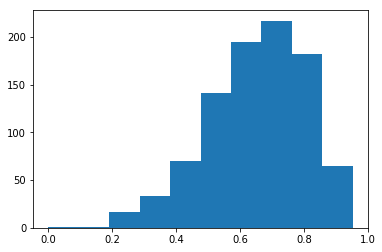

In [37]:
plt.hist(df[df.target=='old school dance'].danceability);

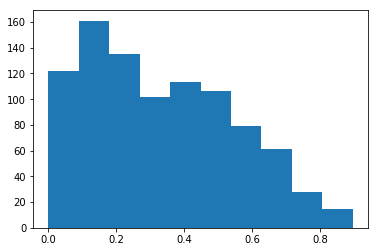

In [39]:
plt.hist(df[df.target=='focus/sleep'].danceability);

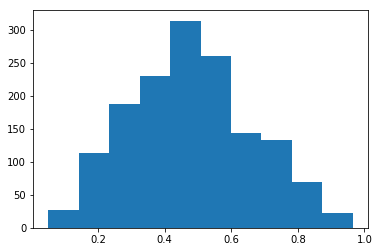

In [40]:
plt.hist(df[df.target=='hardcore'].danceability);

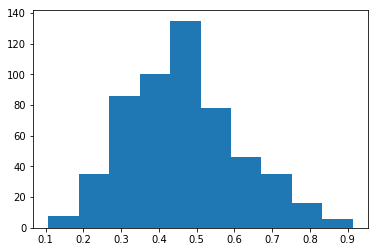

In [41]:
plt.hist(df[df.target=='gospel/worship'].danceability);

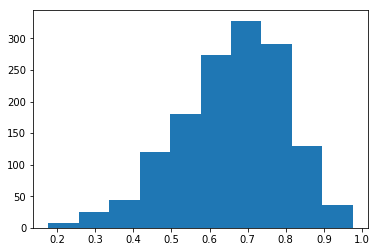

In [42]:
plt.hist(df[df.target=='mexicano/latino'].danceability);

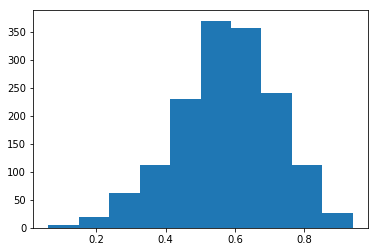

In [44]:
plt.hist(df[df.target=='country, folk'].danceability);

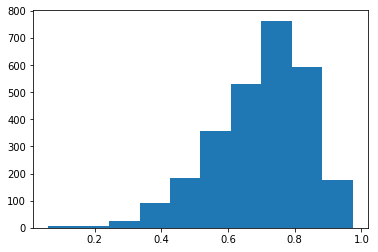

In [45]:
plt.hist(df[df.target=='rap/hip hop'].danceability);

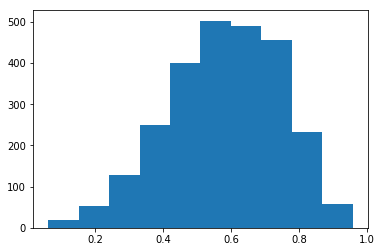

In [75]:
plt.hist(df[df.target=='jazz/blues'].danceability);

In [73]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


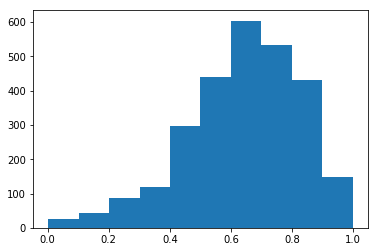

In [46]:
plt.hist(df[df.target=='rap/hip hop'].energy);

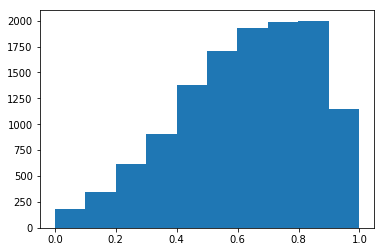

In [47]:
plt.hist(df[df.target=='pop'].energy);

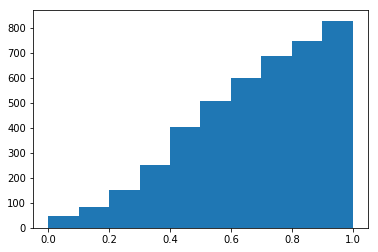

In [48]:
plt.hist(df[df.target=='rock'].energy);

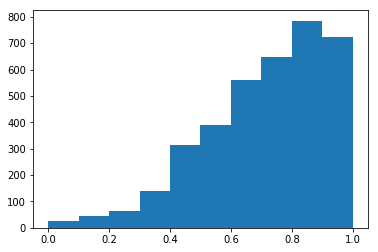

In [49]:
plt.hist(df[df.target=='dance'].energy);

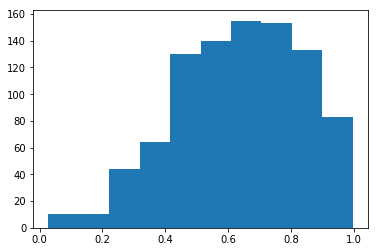

In [50]:
plt.hist(df[df.target=='old school dance'].energy);

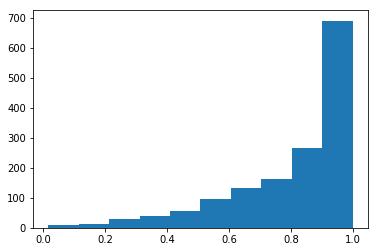

In [51]:
plt.hist(df[df.target=='hardcore'].energy);

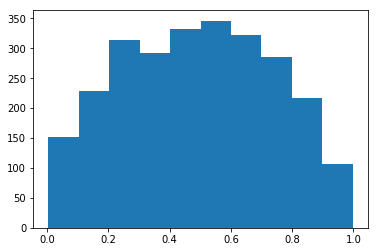

In [52]:
plt.hist(df[df.target=='jazz/blues'].energy);

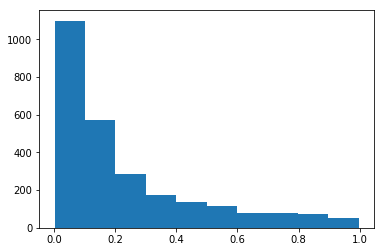

In [53]:
plt.hist(df[df.target=='classical'].energy);

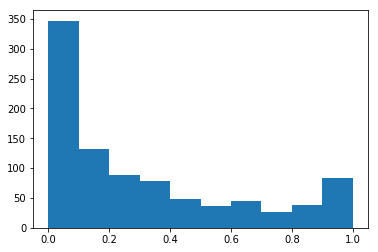

In [54]:
plt.hist(df[df.target=='focus/sleep'].energy);

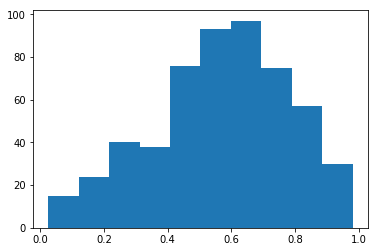

In [55]:
plt.hist(df[df.target=='gospel/worship'].energy);

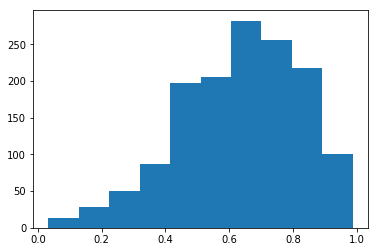

In [56]:
plt.hist(df[df.target=='mexicano/latino'].energy);

In [59]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


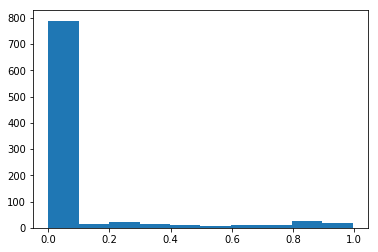

In [60]:
plt.hist(df[df.target=='old school dance'].instrumentalness);

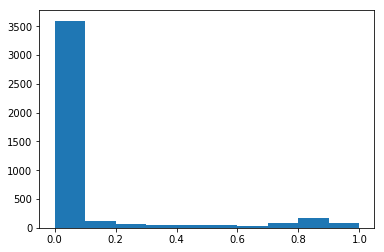

In [61]:
plt.hist(df[df.target=='rock'].instrumentalness);

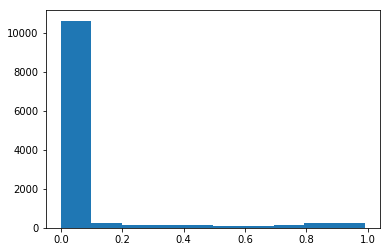

In [62]:
plt.hist(df[df.target=='pop'].instrumentalness);

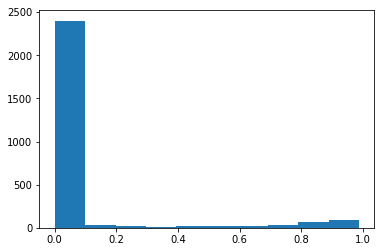

In [63]:
plt.hist(df[df.target=='rap/hip hop'].instrumentalness);

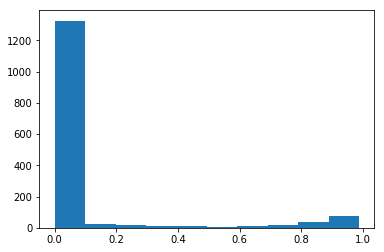

In [64]:
plt.hist(df[df.target=='country, folk'].instrumentalness);

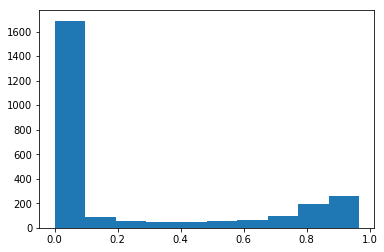

In [65]:
plt.hist(df[df.target=='jazz/blues'].instrumentalness);

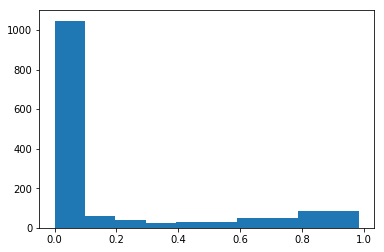

In [67]:
plt.hist(df[df.target=='hardcore'].instrumentalness);

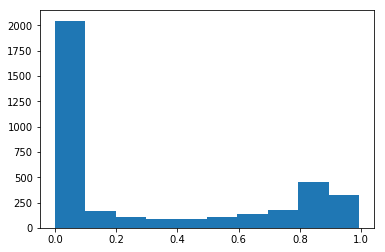

In [68]:
plt.hist(df[df.target=='dance'].instrumentalness);

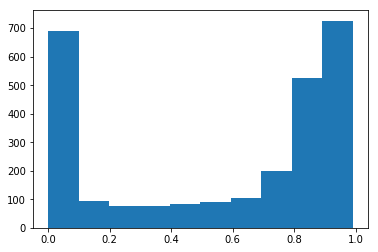

In [69]:
plt.hist(df[df.target=='classical'].instrumentalness);

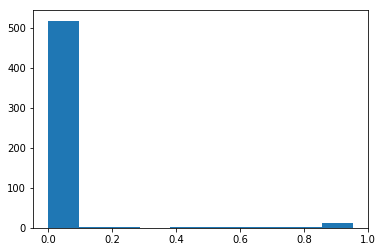

In [70]:
plt.hist(df[df.target=='gospel/worship'].instrumentalness);

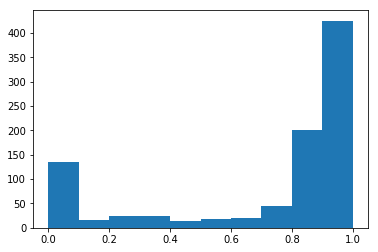

In [71]:
plt.hist(df[df.target=='focus/sleep'].instrumentalness);

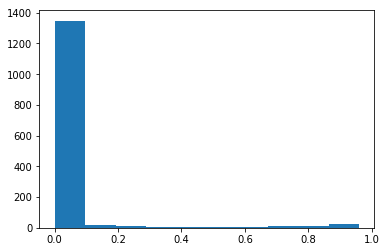

In [72]:
plt.hist(df[df.target=='mexicano/latino'].instrumentalness);

In [76]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


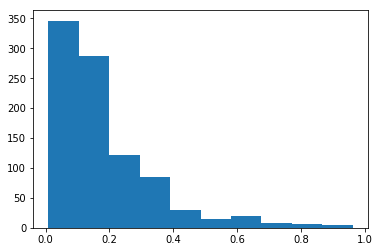

In [77]:
plt.hist(df[df.target=='old school dance'].liveness);

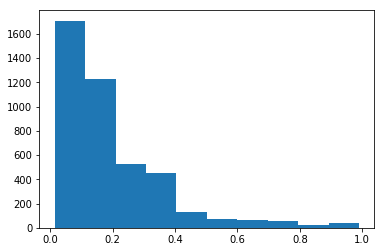

In [78]:
plt.hist(df[df.target=='rock'].liveness);

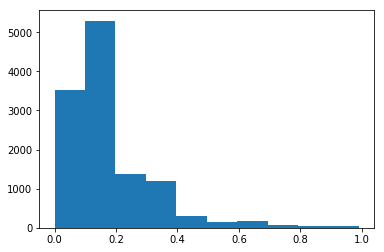

In [79]:
plt.hist(df[df.target=='pop'].liveness);

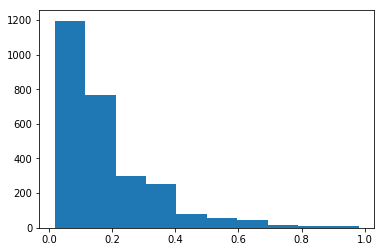

In [80]:
plt.hist(df[df.target=='rap/hip hop'].liveness);

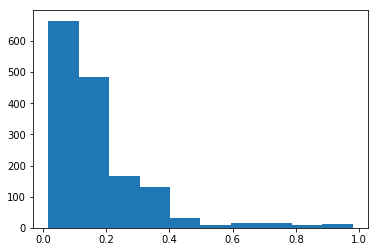

In [81]:
plt.hist(df[df.target=='country, folk'].liveness);

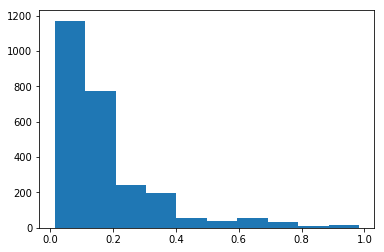

In [82]:
plt.hist(df[df.target=='jazz/blues'].liveness);

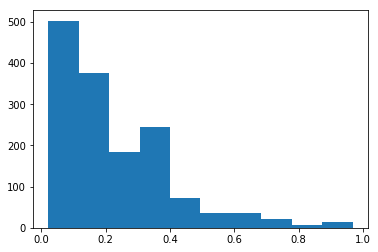

In [84]:
plt.hist(df[df.target=='hardcore'].liveness);

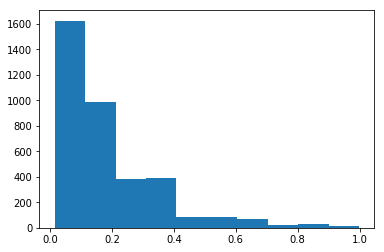

In [85]:
plt.hist(df[df.target=='dance'].liveness);

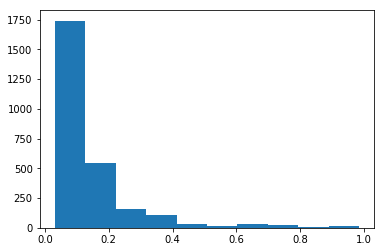

In [86]:
plt.hist(df[df.target=='classical'].liveness);

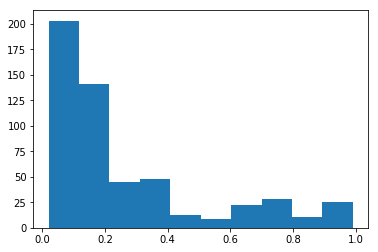

In [87]:
plt.hist(df[df.target=='gospel/worship'].liveness);

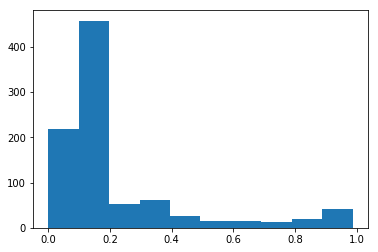

In [88]:
plt.hist(df[df.target=='focus/sleep'].liveness);

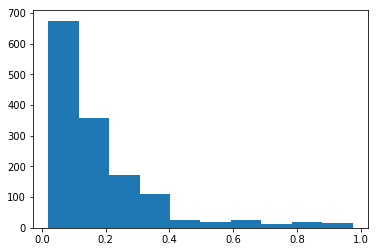

In [89]:
plt.hist(df[df.target=='mexicano/latino'].liveness);

In [90]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


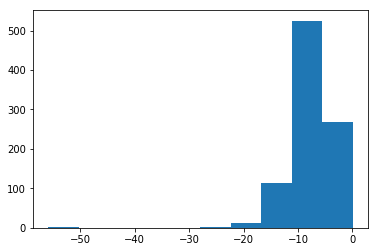

In [91]:
plt.hist(df[df.target=='old school dance'].loudness);

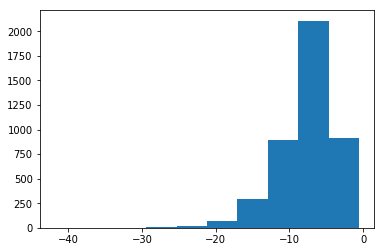

In [92]:
plt.hist(df[df.target=='rock'].loudness);

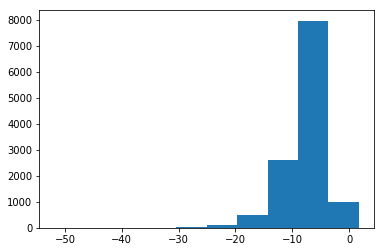

In [93]:
plt.hist(df[df.target=='pop'].loudness);

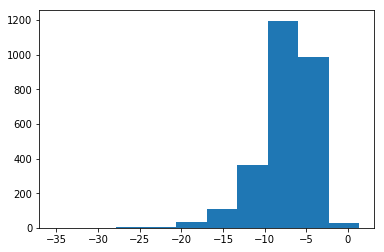

In [94]:
plt.hist(df[df.target=='rap/hip hop'].loudness);

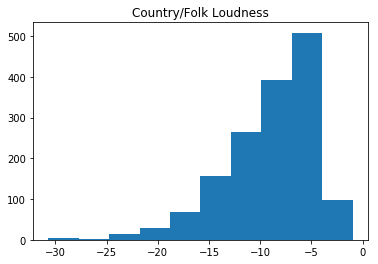

In [82]:
plt.title('Country/Folk Loudness')
plt.hist(df[df.target=='country, folk'].loudness);

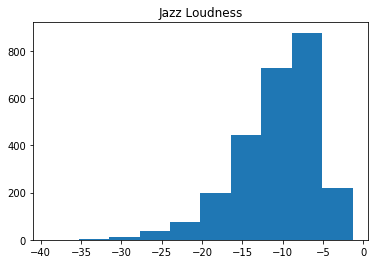

In [83]:
plt.title('Jazz Loudness')
plt.hist(df[df.target=='jazz/blues'].loudness);

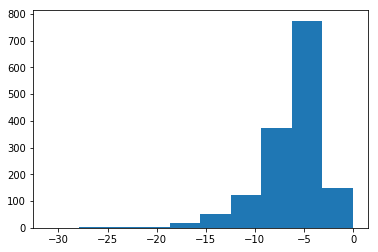

In [98]:
plt.hist(df[df.target=='hardcore'].loudness);

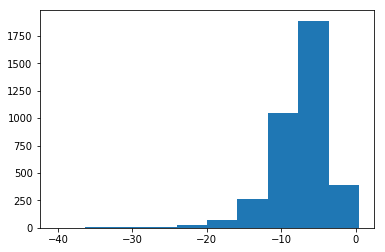

In [99]:
plt.hist(df[df.target=='dance'].loudness);

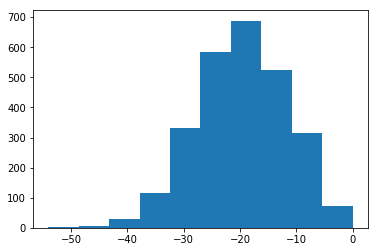

In [100]:
plt.hist(df[df.target=='classical'].loudness);

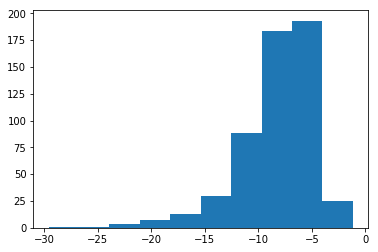

In [101]:
plt.hist(df[df.target=='gospel/worship'].loudness);

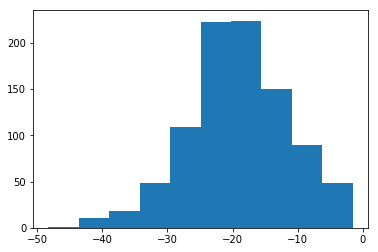

In [102]:
plt.hist(df[df.target=='focus/sleep'].loudness);

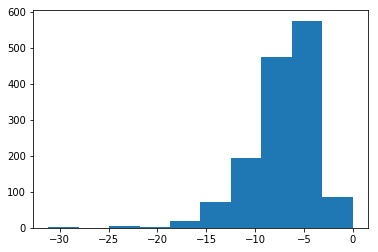

In [103]:
plt.hist(df[df.target=='mexicano/latino'].loudness);

In [104]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


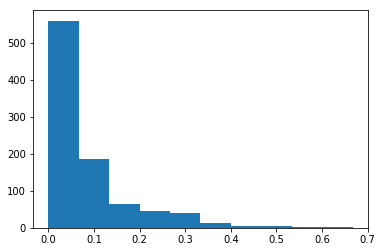

In [105]:
plt.hist(df[df.target=='old school dance'].speechiness);

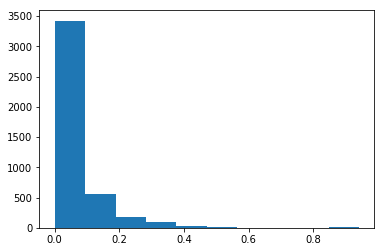

In [106]:
plt.hist(df[df.target=='rock'].speechiness);

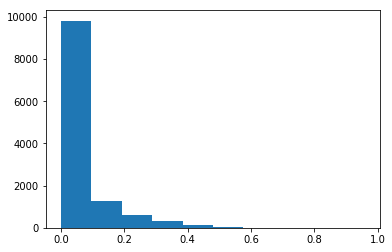

In [107]:
plt.hist(df[df.target=='pop'].speechiness);

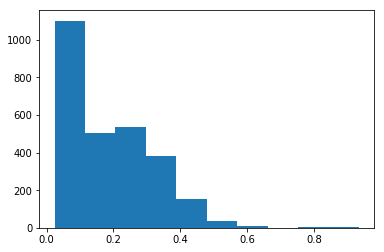

In [108]:
plt.hist(df[df.target=='rap/hip hop'].speechiness);

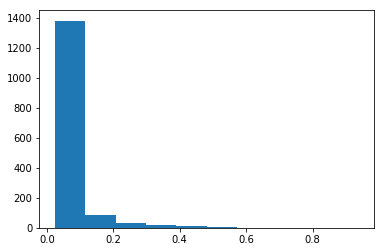

In [109]:
plt.hist(df[df.target=='country, folk'].speechiness);

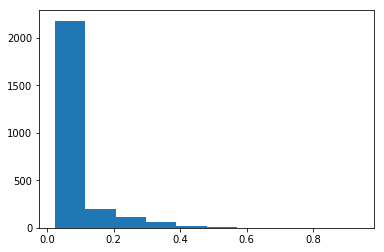

In [110]:
plt.hist(df[df.target=='jazz/blues'].speechiness);

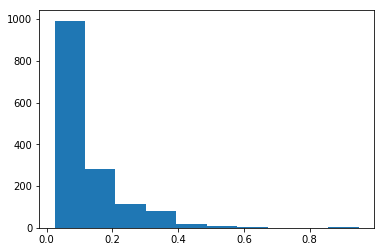

In [111]:
plt.hist(df[df.target=='hardcore'].speechiness);

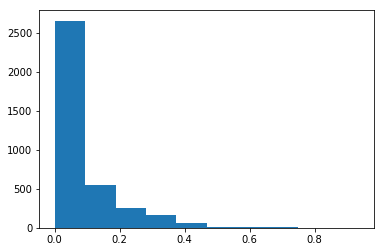

In [112]:
plt.hist(df[df.target=='dance'].speechiness);

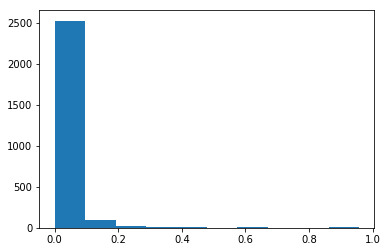

In [113]:
plt.hist(df[df.target=='classical'].speechiness);

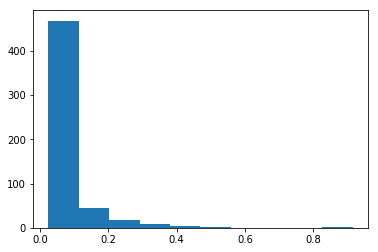

In [114]:
plt.hist(df[df.target=='gospel/worship'].speechiness);

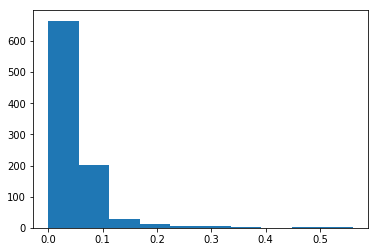

In [115]:
plt.hist(df[df.target=='focus/sleep'].speechiness);

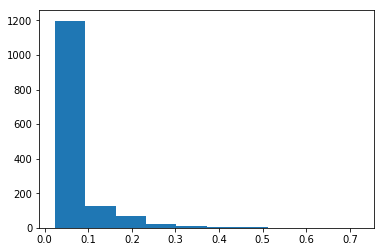

In [116]:
plt.hist(df[df.target=='mexicano/latino'].speechiness);

In [117]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk'
 'jazz/blues' 'hardcore' 'dance' 'classical' 'gospel/worship'
 'focus/sleep' 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


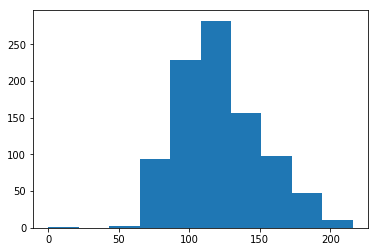

In [118]:
plt.hist(df[df.target=='old school dance'].tempo);

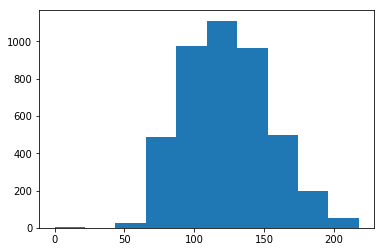

In [119]:
plt.hist(df[df.target=='rock'].tempo);

In [168]:
(df[df.target=='rock'].tempo == 0).sum()

3

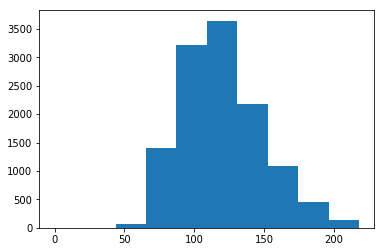

In [120]:
plt.hist(df[df.target=='pop'].tempo);

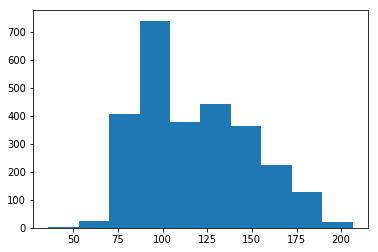

In [121]:
plt.hist(df[df.target=='rap/hip hop'].tempo);

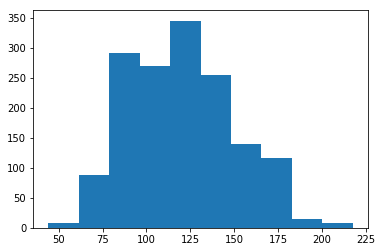

In [122]:
plt.hist(df[df.target=='country, folk'].tempo);

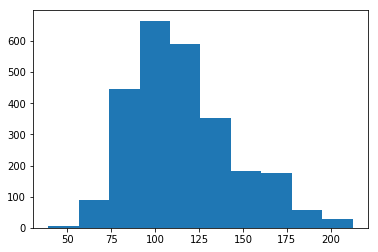

In [123]:
plt.hist(df[df.target=='jazz/blues'].tempo);

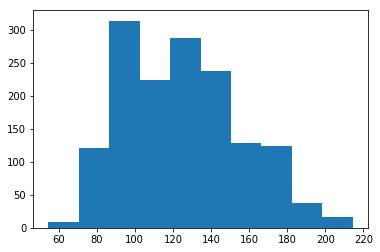

In [124]:
plt.hist(df[df.target=='hardcore'].tempo);

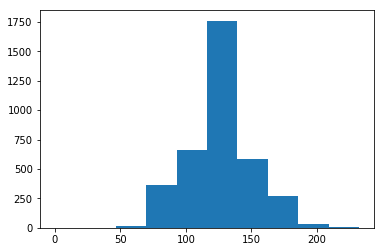

In [125]:
plt.hist(df[df.target=='dance'].tempo);

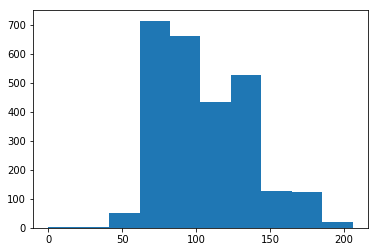

In [126]:
plt.hist(df[df.target=='classical'].tempo);

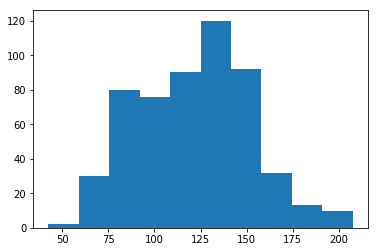

In [127]:
plt.hist(df[df.target=='gospel/worship'].tempo);

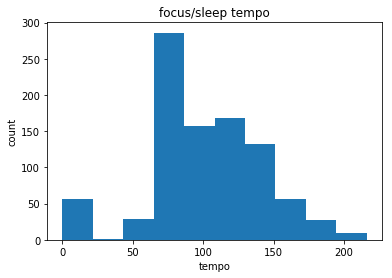

In [11]:
plt.xlabel('tempo')
plt.ylabel('count')
plt.title('focus/sleep tempo')
plt.hist(df[df.target=='focus/sleep'].tempo);

In [134]:
(df.tempo == 0).sum() #problem? look into

68

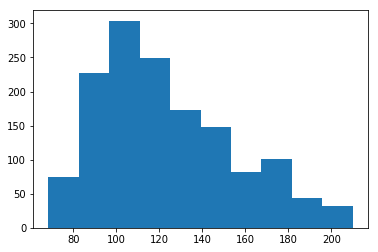

In [135]:
plt.hist(df[df.target=='mexicano/latino'].tempo);

In [6]:
print(df.target.unique())
print(df.columns)

['old school dance' 'rock' 'pop' 'rap/hip hop' 'country, folk' 'jazz/blues'
 'hardcore' 'dance' 'classical' 'gospel/worship' 'focus/sleep'
 'mexicano/latino']
Index(['acousticness', 'artist_name', 'artist_uri', 'danceability', 'energy',
       'genre', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'time_signature', 'track_id',
       'track_name', 'valence', 'target'],
      dtype='object')


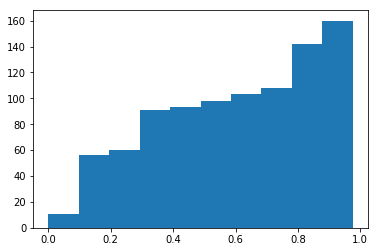

In [152]:
plt.hist(df[df.target=='old school dance'].valence);

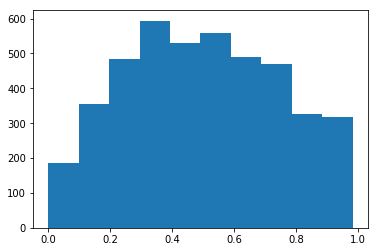

In [153]:
plt.hist(df[df.target=='rock'].valence);

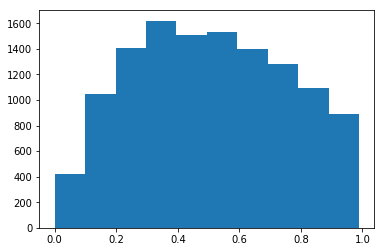

In [154]:
plt.hist(df[df.target=='pop'].valence);

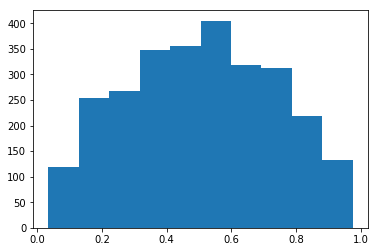

In [155]:
plt.hist(df[df.target=='rap/hip hop'].valence);

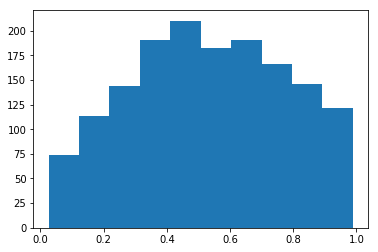

In [156]:
plt.hist(df[df.target=='country, folk'].valence);

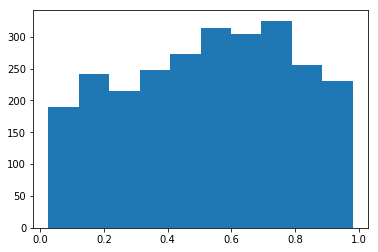

In [157]:
plt.hist(df[df.target=='jazz/blues'].valence);

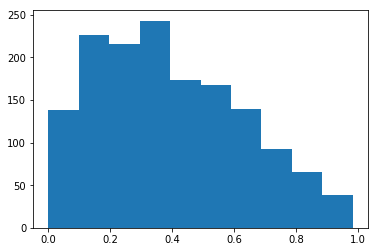

In [161]:
plt.hist(df[df.target=='hardcore'].valence);

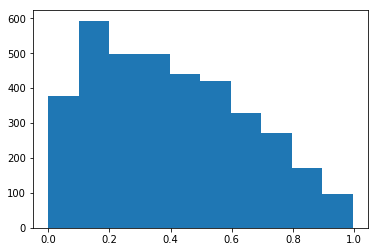

In [162]:
plt.hist(df[df.target=='dance'].valence);

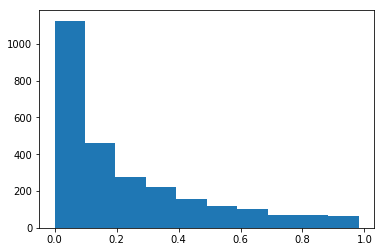

In [163]:
plt.hist(df[df.target=='classical'].valence);

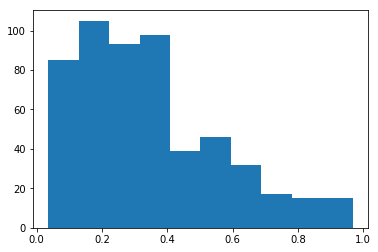

In [164]:
plt.hist(df[df.target=='gospel/worship'].valence);

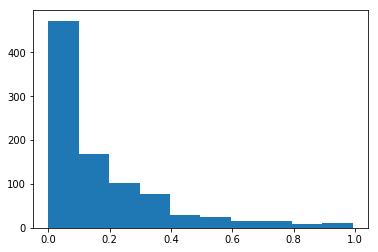

In [165]:
plt.hist(df[df.target=='focus/sleep'].valence);

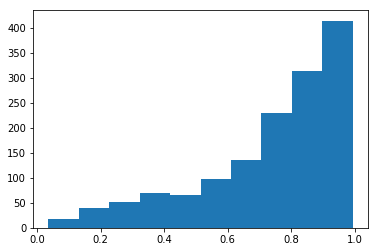

In [6]:
plt.hist(df[df.target=='mexicano/latino'].valence);

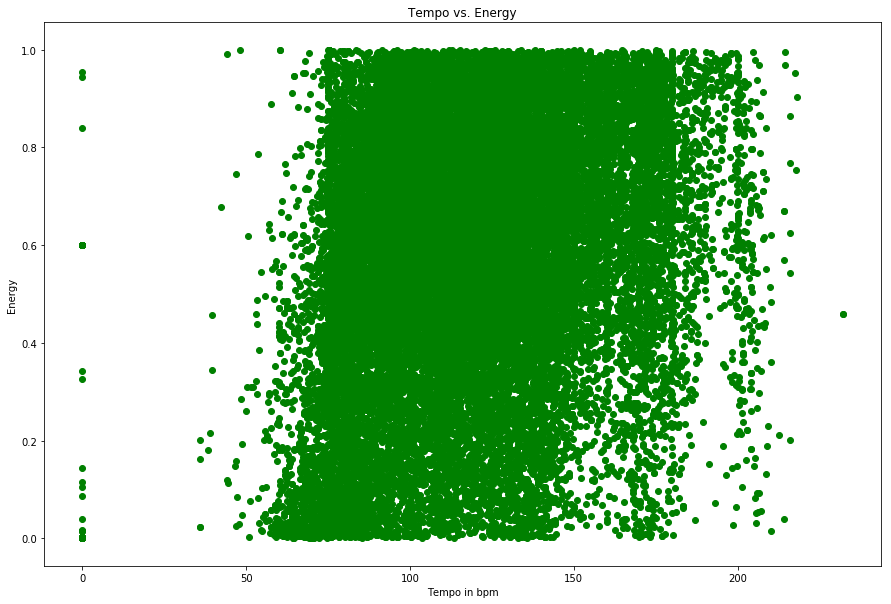

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(df.tempo, df.energy,c='g')
plt.xlabel('Tempo in bpm')
plt.ylabel('Energy')
plt.title('Tempo vs. Energy')
plt.show()

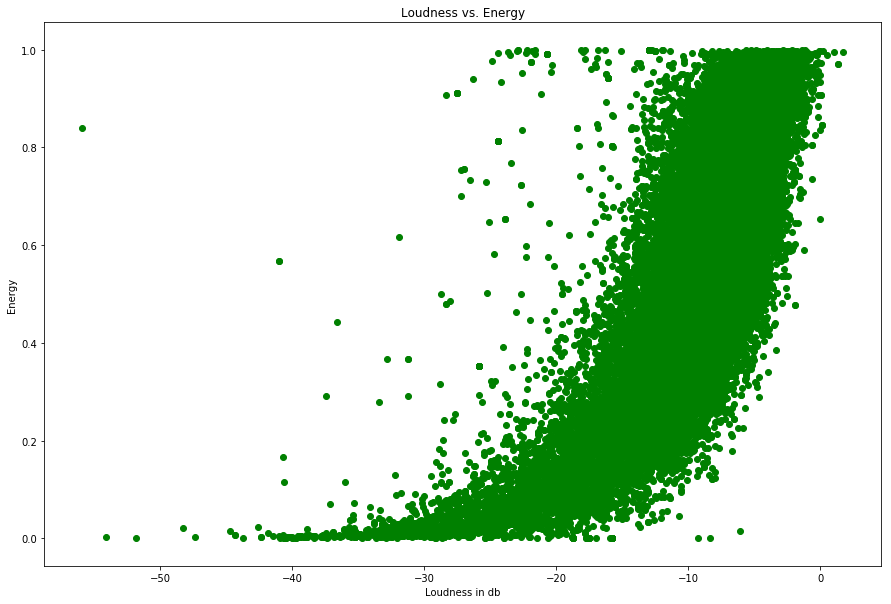

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(df.loudness, df.energy,c='g')
plt.xlabel('Loudness in db')
plt.ylabel('Energy')
plt.title('Loudness vs. Energy')
plt.show()

In [6]:
# these tracks represent a majority of sleep tracks, ex. white noise, nature sounds
df.loc[df.time_signature == 0]
df.loc[df.tempo == 0].head()

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target
1140,0.119,Ambient Rain,spotify:artist:5nSGBmlgUdqWNExnOX8VtV,0.0,0.601000,['sleep'],0.771,11,0.968,-13.753,0,69,0.0,0.0,0,7dTyZl4cBRKnPBeq1fdrHY,White Noise,0.0,focus/sleep
1796,0.000,Art Of Noise,spotify:artist:1XqT7nMi7H4WDGdzurdh0r,0.0,0.000000,"['acid house', 'dance rock', 'electronic', 'ne...",0.000,11,0.000,-51.835,0,51,0.0,0.0,0,2lF8i11YFtllDacDlFnKqU,Hi Cut Brown Noise,0.0,pop
1890,0.865,Asmr,spotify:artist:7nR813jWFgkPsXs1GjrzZk,0.0,0.000345,['sleep'],0.263,11,0.104,-23.931,1,49,0.0,0.0,0,1sku0BerKMi7ZumZkIebJ5,ASMR : Big Fan Noise (REM Sleep),0.0,focus/sleep
1891,0.865,ASMR HD,spotify:artist:7nR813jWFgkPsXs1GjrzZk,0.0,0.000345,['sleep'],0.263,11,0.104,-23.931,1,49,0.0,0.0,0,1sku0BerKMi7ZumZkIebJ5,ASMR : Big Fan Noise (REM Sleep),0.0,focus/sleep
2210,0.791,Baby Sweet Dream,spotify:artist:2c5WYCqQGs0UttiLCzVfOe,0.0,0.003420,['sleep'],1.000,11,0.111,-28.460,1,60,0.0,0.0,0,2ifiCzo5SSPeWbPIUdvSPA,White Noise - Loopable With No Fade,0.0,focus/sleep


# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,  train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier

In [112]:
# make a target, y
y = df['target']

In [113]:
#transform y, 0-11 utilizing label encoder
le = LabelEncoder()
y = le.fit_transform(y)


In [114]:
#features
X = df[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.5710,0.641,0.665,0.001070,0.159,-7.839,1,0.0263,138.017,4,0.677
1,0.1220,0.796,0.513,0.000000,0.150,-7.140,0,0.4520,75.018,4,0.235
2,0.2290,0.792,0.256,0.548000,0.350,-12.525,1,0.1910,87.774,4,0.563
3,0.0375,0.703,0.696,0.000006,0.274,-5.482,1,0.0529,121.969,4,0.366
4,0.8830,0.610,0.258,0.014500,0.103,-12.758,1,0.0331,127.080,4,0.164


In [115]:
#check correlations
abs(pd.concat([X, pd.Series(y)], axis=1).corr()[0]).sort_values(ascending = False)

0                   1.000000
instrumentalness    0.379643
loudness            0.378182
energy              0.259972
acousticness        0.252489
valence             0.248648
danceability        0.241037
speechiness         0.095714
time_signature      0.092222
tempo               0.075416
liveness            0.014123
mode                0.008088
Name: 0, dtype: float64

In [116]:
#how the lables work in label encoder, alphabetical
list(zip(np.unique(y), np.unique(le.inverse_transform(y))))

/Users/scottsanowitz/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[(0, 'classical'),
 (1, 'country, folk'),
 (2, 'dance'),
 (3, 'focus/sleep'),
 (4, 'gospel/worship'),
 (5, 'hardcore'),
 (6, 'jazz/blues'),
 (7, 'mexicano/latino'),
 (8, 'old school dance'),
 (9, 'pop'),
 (10, 'rap/hip hop'),
 (11, 'rock')]

In [117]:
#form, training, validating, and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=24)

In [118]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=24)

In [119]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(19714, 11)
(6572, 11)
(19714,)
(6572,)


# Random Forest

In [34]:
# pipeline with random forest to be randomized search
pipe = Pipeline([
    ('rf', RandomForestClassifier(random_state= 24))
])

In [35]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.44004869141813757

In [22]:
#parameters to iterate over
params = {
    'rf__n_estimators':[1, 10,25, 50, 100, 500, 1000],
    'rf__max_features':[None,"sqrt", "log2"]
}

In [23]:
# randomized search cross validatio
rs = RandomizedSearchCV(pipe, param_distributions=params,scoring='accuracy', random_state=24 )

In [24]:
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'rf__n_estimators': [1, 10, 25, 50, 100, 500, 1000], 'rf__max_features': [None, 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=24, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [25]:
print('best_params:',rs.best_params_)
print('best score:',rs.best_score_)

best_params: {'rf__n_estimators': 1000, 'rf__max_features': 'sqrt'}
best score: 0.481663242791


In [18]:
# More trees(n_estiamtors) better score
rf = RandomForestClassifier(n_estimators=5_000, max_features = 'sqrt', random_state=24)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [20]:
rf.score(X_train, y_train)

0.9821446687633154

In [21]:
rf.score(X_val, y_val)

0.4838709677419355

In [22]:
rf.score(X_test, y_test)

0.49480771425310965

In [23]:
s = sorted(list(zip(rf.feature_importances_, X.columns )), reverse=True)

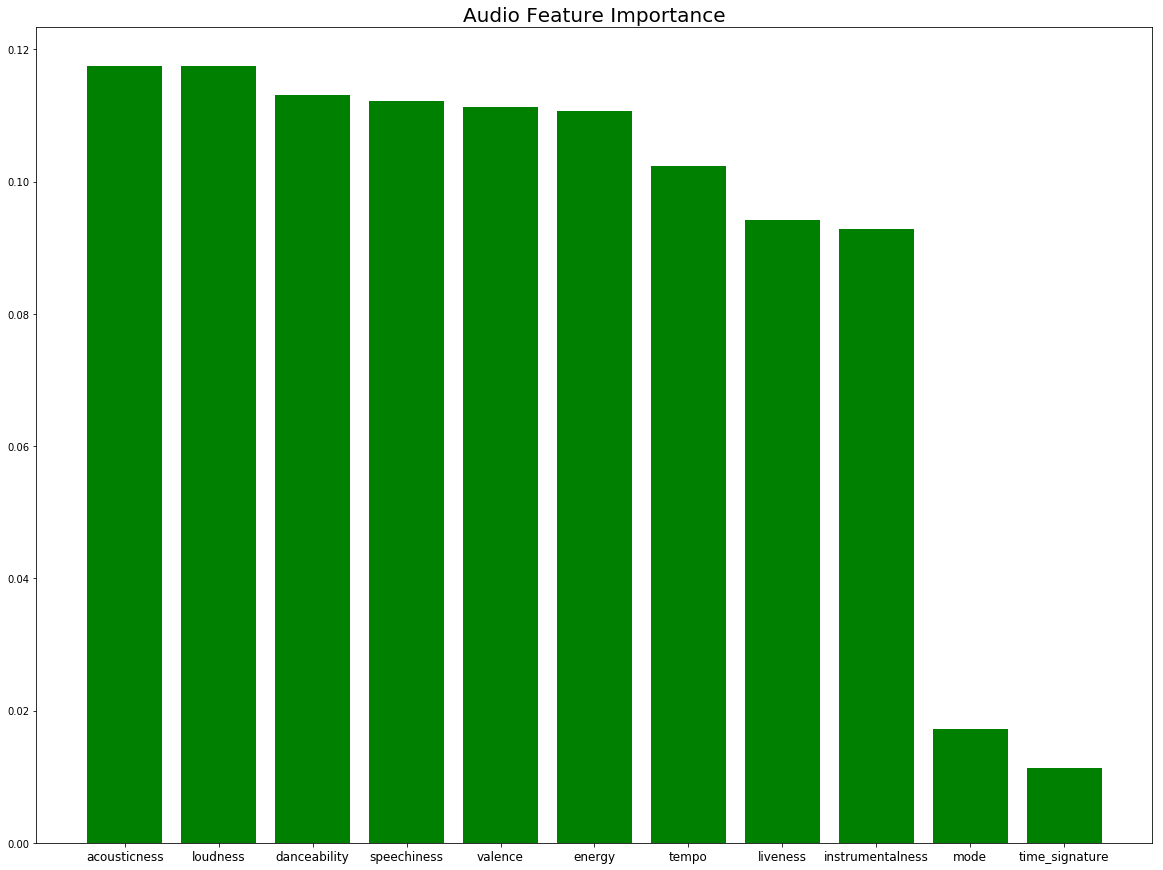

In [24]:
#graph feature importance

plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

In [25]:
y_hat = rf.predict(X_test)

In [111]:
target_names = ['classical', 'country/folk', 'dance', 'focus/sleep', 'gospel/worship', 'hardcore',
               'jazz/blues', 'mexicano/latino', 'old school dance', 'pop', 'rap/hip hop', 'rock']

In [27]:
print(classification_report(y_test, y_hat, target_names=target_names))

                  precision    recall  f1-score   support

       classical       0.62      0.74      0.67       666
    country/folk       0.59      0.07      0.12       384
           dance       0.58      0.44      0.50       924
     focus/sleep       0.70      0.39      0.50       231
  gospel/worship       0.56      0.17      0.26       136
        hardcore       0.48      0.26      0.34       375
      jazz/blues       0.41      0.23      0.30       648
 mexicano/latino       0.53      0.17      0.26       359
old school dance       0.59      0.07      0.12       231
             pop       0.47      0.82      0.59      3050
     rap/hip hop       0.48      0.42      0.45       682
            rock       0.47      0.18      0.26      1077

     avg / total       0.51      0.49      0.45      8763



In [26]:
pd.DataFrame([le.inverse_transform(y_hat), le.inverse_transform(y_test)]).T.head(10)

,0,1
0,pop,pop
1,pop,pop
2,pop,pop
3,dance,dance
4,pop,rock
5,pop,pop
6,mexicano/latino,pop
7,pop,rock
8,classical,focus/sleep
9,pop,pop


In [27]:
pd.Series(le.inverse_transform(y_hat)).value_counts(normalize=True)

pop                 0.600365
classical           0.089467
dance               0.084788
rap/hip hop         0.069040
rock                0.051923
jazz/blues          0.041995
hardcore            0.020883
focus/sleep         0.014607
mexicano/latino     0.013352
country, folk       0.006162
gospel/worship      0.004108
old school dance    0.003309
dtype: float64

In [28]:
pd.Series(le.inverse_transform(y_test)).value_counts(normalize=True)

pop                 0.348054
rock                0.122903
dance               0.105443
rap/hip hop         0.077827
classical           0.076001
jazz/blues          0.073947
country, folk       0.043821
hardcore            0.042794
mexicano/latino     0.040968
old school dance    0.026361
focus/sleep         0.026361
gospel/worship      0.015520
dtype: float64

# Weighted Random Forest

In [21]:
#ratio between majority class to other class, pop is class 9 so 9:1, so for 1 rock song how many pop songs and so on?
class_weight_norm ={0:4.5, 1:8, 2:3.3, 3:13.5, 4:23.3, 5:8.1, 6:4.7, 7:8.5, 8:13.5, 9:1, 10:5, 11:2.8}
class_weight_pred ={0:6.7, 1:100, 2:7.1, 3:42.8, 4:150, 5:30, 6:14.3, 7:46.2, 8:200, 9:1, 10:8.7, 11:11.5}

In [22]:
rf_weighted = RandomForestClassifier(n_estimators=1000, max_features='sqrt', class_weight=class_weight_norm, random_state=24)

In [23]:
rf_weighted.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True,
            class_weight={0: 4.5, 1: 8, 2: 3.3, 3: 13.5, 4: 23.3, 5: 8.1, 6: 4.7, 7: 8.5, 8: 13.5, 9: 1, 10: 5, 11: 2.8},
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

In [24]:
rf_weighted.score(X_val, y_val)

0.4847839318320146

In [25]:
rf_weighted.score(X_test, y_test)

0.48978660276161134

In [26]:
s = sorted(list(zip(rf_weighted.feature_importances_, X.columns )), reverse=True)

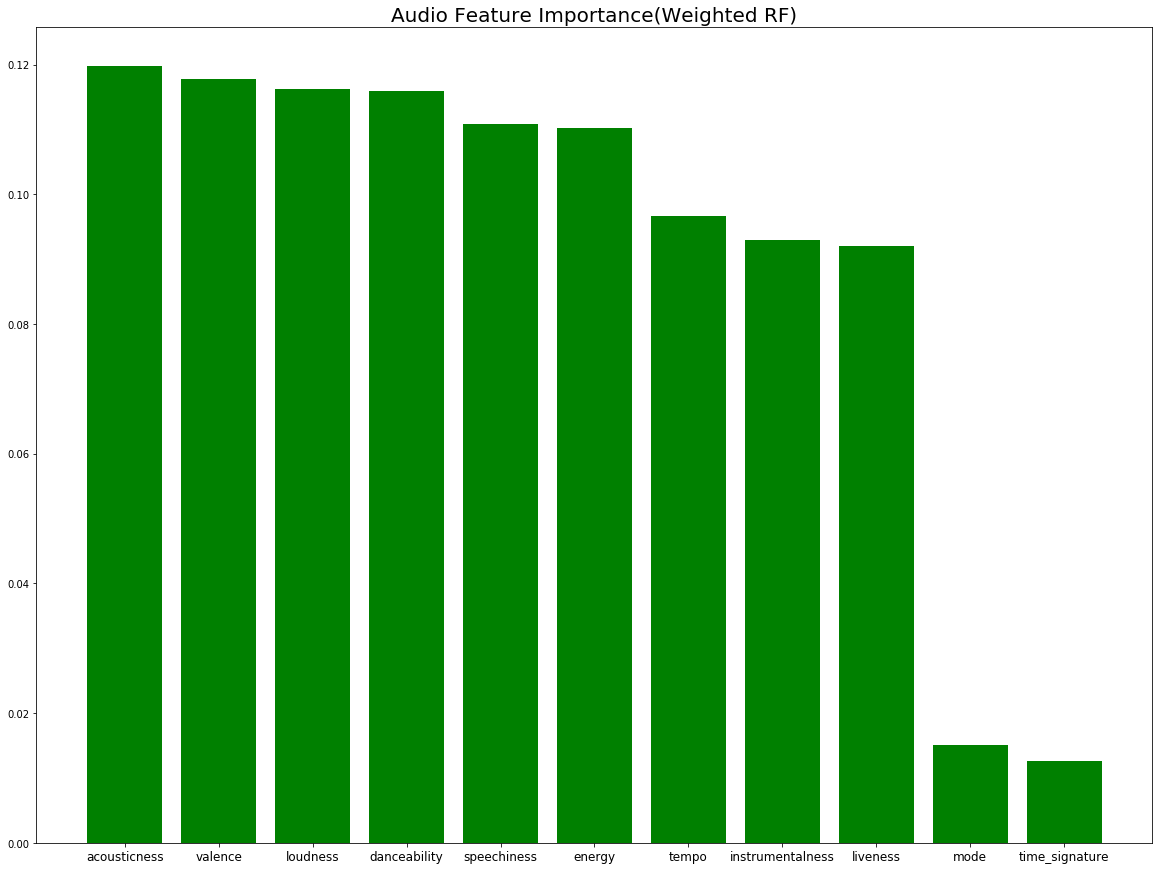

In [27]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance(Weighted RF)', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

In [59]:
y_hat_w = rf_weighted.predict(X_test)

In [60]:
print(classification_report(y_test, y_hat_w, target_names=target_names))

                  precision    recall  f1-score   support

       classical       0.62      0.74      0.67       666
    country/folk       0.63      0.07      0.13       384
           dance       0.58      0.43      0.50       924
     focus/sleep       0.72      0.36      0.48       231
  gospel/worship       0.56      0.18      0.27       136
        hardcore       0.45      0.25      0.32       375
      jazz/blues       0.43      0.21      0.28       648
 mexicano/latino       0.62      0.18      0.28       359
old school dance       0.53      0.07      0.13       231
             pop       0.46      0.83      0.59      3050
     rap/hip hop       0.47      0.39      0.42       682
            rock       0.47      0.15      0.23      1077

     avg / total       0.51      0.49      0.44      8763



In [104]:
pd.Series(le.inverse_transform(y_hat_w)).value_counts(normalize=True)

pop                 0.623531
classical           0.090951
dance               0.078055
rap/hip hop         0.062992
rock                0.046674
jazz/blues          0.034805
hardcore            0.023051
focus/sleep         0.014265
mexicano/latino     0.011183
country, folk       0.006276
gospel/worship      0.004336
old school dance    0.003880
dtype: float64

# Logistic Regression

In [120]:
pipe = Pipeline([
    ('lr', LogisticRegression())
])

In [121]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [122]:
pipe.score(X_val, y_val)

0.4286366402921485

In [123]:
pipe.score(X_test, y_test)

0.42987561337441516

In [124]:
params = {
    'lr__penalty':['l1','l2'],
    'lr__C':[.1, 1, 10],
    'lr__warm_start':[False, True]
}

In [125]:
log_gs = GridSearchCV(pipe,param_grid=params, scoring='accuracy', cv = 5)

In [126]:
log_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [0.1, 1, 10], 'lr__warm_start': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [127]:
log_gs.best_params_

{'lr__C': 10, 'lr__penalty': 'l1', 'lr__warm_start': False}

In [128]:
log_gs.best_score_

0.4276148929694633

In [73]:
log_gs.best_index_

9

In [129]:
lr = LogisticRegression(C=25, penalty='l1')

In [130]:
lr.fit(X_train, y_train)

LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
#try n graph
lr.



'ovr'

# SGD Classifier

In [34]:
sgd = SGDClassifier(random_state=24)


In [35]:
sgd.fit(X_train, y_train)

/Users/scottsanowitz/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=24, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [36]:
sgd.score(X_val, y_val)

0.24026171637248936

In [46]:
pipe = Pipeline([
    ('sgd',SGDClassifier(random_state=24, tol=0) )
])

In [47]:
params = {
    'sgd__loss':['hinge', 'log', 'modified_huber',
    'squared_hinge', 'perceptron'],
    'sgd__penalty':['l1', 'l2', None,'elasticnet'],
    'sgd__alpha':np.arange(0,1,.0001)
    
}

In [48]:
rs = RandomizedSearchCV(pipe, param_distributions=params, scoring='accuracy', random_state=24)

In [49]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=24, shuffle=True,
       tol=0, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'sgd__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'sgd__penalty': ['l1', 'l2', None, 'elasticnet'], 'sgd__alpha': array([0.000e+00, 1.000e-04, ..., 9.998e-01, 9.999e-01])},
          pre_dispatch='2*n_jobs', random_state=24, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [50]:
print('best_params:',rs.best_params_)
print('best score:',rs.best_score_)

best_params: {'sgd__penalty': 'l2', 'sgd__loss': 'log', 'sgd__alpha': 0.7635000000000001}
best score: 0.37983159176219944


# XGBoost

In [48]:
xgb = XGBClassifier(n_estimators=1_000, random_state=24,objective='multi:softmax', num_class=12)

In [49]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, num_class=12, objective='multi:softprob',
       random_state=24, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [50]:
xgb.score(X_val,y_val)

0.46226415094339623

In [51]:
xgb.score(X_test,y_test)

0.4638822321122903

In [68]:
pipe_xgb = Pipeline([
    ('xgb', XGBClassifier(n_estimators=100, random_state=24,objective='multi:softmax', num_class=12, n_jobs=12))
])

In [69]:
params={'xgb__reg_alpha':np.arange(0,1,.1),
        'xgb__reg_lambda': np.arange(0,1,.1),
        'xgb__max_depth':[3,4,5,6,7,8,9,10]}

In [70]:
rs = RandomizedSearchCV(pipe_xgb, param_distributions=params, random_state=24)

In [71]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=12, nthread=None, num_class=12, objective='multi:softmax',
       random_state=24, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'xgb__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'xgb__reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=24, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [72]:
rs.best_score_

0.46251394947752866

In [73]:
rs.best_params_

{'xgb__reg_lambda': 0.9, 'xgb__reg_alpha': 0.9, 'xgb__max_depth': 7}

In [74]:
xgb = XGBClassifier(n_estimators=1_000, random_state=24,objective='multi:softmax', num_class=12,
                   n_jobs=2, reg_alpha=.9, reg_lambda=.9, max_depth =7)

In [75]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=2, nthread=None, num_class=12, objective='multi:softprob',
       random_state=24, reg_alpha=0.9, reg_lambda=0.9, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [76]:
xgb.score(X_val, y_val)

0.46850273889227023

In [77]:
xgb.score(X_test, y_test)

0.474266803606071

In [79]:
s = sorted(list(zip(xgb.feature_importances_, X.columns )), reverse=True)

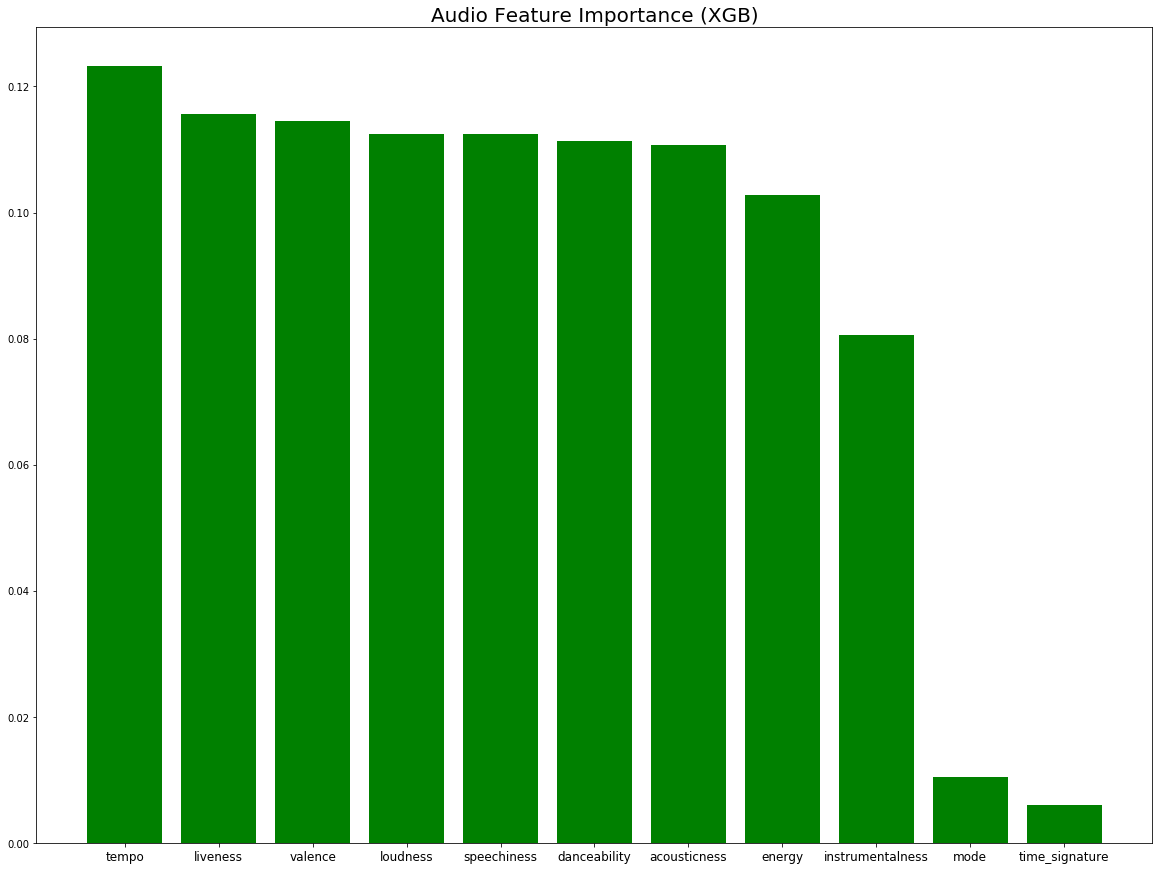

In [80]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance (XGB)', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

In [81]:
#try one vs rest

# Neural Net

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda 
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K


Using TensorFlow backend.


In [75]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [76]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [77]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [78]:
print(X_train.shape)
print(y_train.shape)

(19714, 11)
(19714, 12)


In [79]:
model = Sequential()

n_input = X_train.shape[1]
n_output = y_train.shape[1]

model.add(Dense(n_input, input_dim=n_input, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(n_output, activation = 'softmax'))


In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0)

In [81]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                      epochs=100, batch_size=75,
                     callbacks=[early_stop])

Train on 19714 samples, validate on 8763 samples
Epoch 1/100
19714/19714 [==============================] - 1s 38us/step - loss: 2.0921 - acc: 0.3628 - val_loss: 1.9036 - val_acc: 0.4037
Epoch 2/100
19714/19714 [==============================] - 0s 20us/step - loss: 1.8590 - acc: 0.4085 - val_loss: 1.8147 - val_acc: 0.4173
Epoch 3/100
19714/19714 [==============================] - 0s 22us/step - loss: 1.7905 - acc: 0.4158 - val_loss: 1.7627 - val_acc: 0.4187
Epoch 4/100
19714/19714 [==============================] - 0s 22us/step - loss: 1.7554 - acc: 0.4210 - val_loss: 1.7398 - val_acc: 0.4215
Epoch 5/100
19714/19714 [==============================] - 0s 21us/step - loss: 1.7367 - acc: 0.4214 - val_loss: 1.7249 - val_acc: 0.4236
Epoch 6/100
19714/19714 [==============================] - 0s 20us/step - loss: 1.7250 - acc: 0.4232 - val_loss: 1.7188 - val_acc: 0.4260
Epoch 7/100
19714/19714 [==============================] - 0s 21us/step - loss: 1.7176 - acc: 0.4239 - val_loss: 1.7103 - v

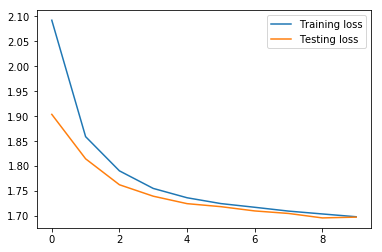

In [83]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend();

# Add NLP to models via song titles

In [84]:
df.head()

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target
0,0.5710,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.001070,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677,old school dance
1,0.1220,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.000000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235,rock
2,0.2290,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.548000,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563,pop
3,0.0375,2,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,0.703,0.696,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",0.000006,11,0.274,-5.482,1,98,0.0529,121.969,4,5SxkdsY1ufZzoq9iXceLw9,no tears left to cry,0.366,pop
4,0.8830,3,spotify:artist:15UsOTVnJzReFVN1VCnxy4,0.610,0.258,"['alternative metal', 'canadian metal', 'canad...",0.014500,11,0.103,-12.758,1,81,0.0331,127.080,4,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.164,pop


In [85]:
cvec = CountVectorizer(stop_words='english')
tracks = cvec.fit_transform(df['track_name'])

In [86]:
tracks= pd.DataFrame(tracks.toarray(), columns=cvec.get_feature_names(), index = df.index)

In [87]:
tracks.head()

,000,01,02,028,0330,06,07,0ne,10,100,...,웃으며,위글위글,이별의,저지른,정인,종이,중독,촉이,해줘요,헤어지지
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X = df[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
       

In [89]:
X = pd.concat([X, tracks], axis=1)

In [90]:
y = df['target']

In [91]:
le = LabelEncoder()
y = le.fit_transform(y)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=24)

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=24)

In [94]:
X_train.shape

(19714, 23788)

In [96]:
rf = RandomForestClassifier(n_estimators=200, max_features='sqrt')

In [97]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
rf.score(X_val, y_val)

0.4910225197808886

In [99]:
rf.score(X_test, y_test)

0.494921830423371

In [100]:
s = sorted(list(zip( rf.feature_importances_, X.columns)),reverse=True)[:11]

In [101]:
s

[(0.046893695272811176, 'acousticness'),
 (0.04579125505137716, 'loudness'),
 (0.04528207130671842, 'danceability'),
 (0.04454875277318285, 'energy'),
 (0.04358762565350545, 'speechiness'),
 (0.0430463434719716, 'instrumentalness'),
 (0.042814339374798116, 'valence'),
 (0.03803733207774221, 'tempo'),
 (0.03581401090733192, 'liveness'),
 (0.00697392701884975, 'mode'),
 (0.0067937136827878955, 'time_signature')]

In [102]:
y_hat_nlp = rf.predict(X_test)

In [103]:
print(classification_report(y_test, y_hat_nlp, target_names=target_names))

                  precision    recall  f1-score   support

       classical       0.71      0.71      0.71       666
    country/folk       0.61      0.06      0.10       384
           dance       0.63      0.42      0.50       924
     focus/sleep       0.67      0.46      0.55       231
  gospel/worship       0.66      0.14      0.23       136
        hardcore       0.51      0.21      0.30       375
      jazz/blues       0.53      0.18      0.26       648
 mexicano/latino       0.72      0.26      0.38       359
old school dance       0.62      0.07      0.12       231
             pop       0.44      0.88      0.59      3050
     rap/hip hop       0.54      0.28      0.37       682
            rock       0.49      0.14      0.21      1077

     avg / total       0.54      0.49      0.44      8763



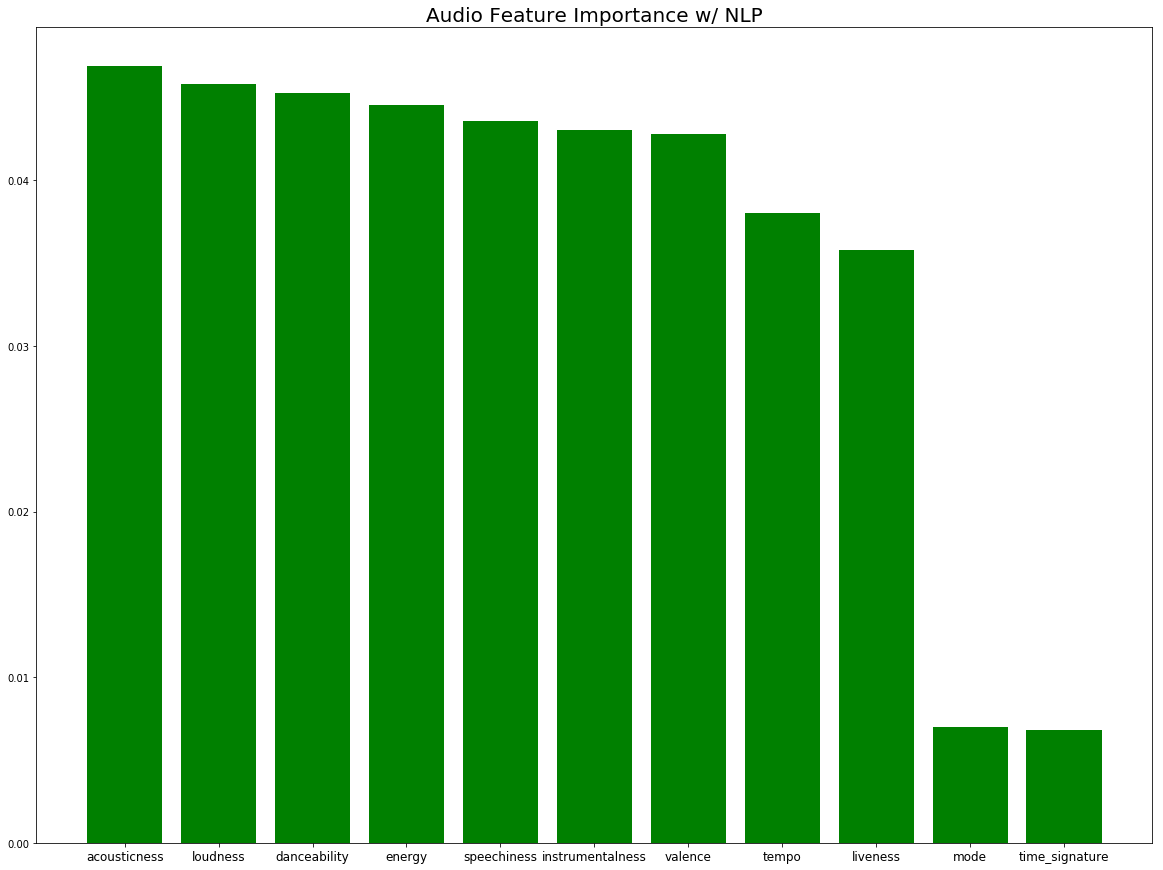

In [104]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance w/ NLP', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

# Clustering Audio Features

In [10]:
from sklearn.cluster import KMeans

In [11]:
df.head(5)

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target
0,0.5710,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.001070,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677,old school dance
1,0.1220,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.000000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235,rock
2,0.2290,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.548000,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563,pop
3,0.0375,2,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,0.703,0.696,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",0.000006,11,0.274,-5.482,1,98,0.0529,121.969,4,5SxkdsY1ufZzoq9iXceLw9,no tears left to cry,0.366,pop
4,0.8830,3,spotify:artist:15UsOTVnJzReFVN1VCnxy4,0.610,0.258,"['alternative metal', 'canadian metal', 'canad...",0.014500,11,0.103,-12.758,1,81,0.0331,127.080,4,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.164,pop


In [12]:
X = df[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]


In [13]:
km = KMeans(n_clusters=12, random_state=24) # try 12 same number as I made

In [14]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=24, tol=0.0001, verbose=0)

In [15]:
pd.Series(km.labels_).value_counts()

5     6697
1     5646
8     4934
11    4482
9     3757
0     2770
10    2662
4     1173
2     1121
7     1010
3      729
6       68
dtype: int64

In [16]:
6697/len(X) #new baseline

0.19107535165054637

In [17]:
df['predicted'] = km.labels_

In [18]:
df['predicted']

0        11
1         9
2         9
3         5
4         5
5         8
6         2
7         8
8         8
9         8
10        8
11        8
12        8
13        8
14       10
15       10
16        0
17        5
18       11
19       11
20        1
21       11
22        8
23        1
24        3
25        1
26        5
27       11
28        1
29       10
         ..
35019    11
35020     1
35021    11
35022    11
35023     9
35024     9
35025    10
35026     8
35027     9
35028     4
35029    11
35030     5
35031     9
35032     5
35033    11
35034     1
35035     9
35036     5
35037     5
35038     5
35039     1
35040     5
35041     8
35042    11
35043     9
35044     0
35045     2
35046    10
35047     3
35048     9
Name: predicted, Length: 35049, dtype: int32

In [19]:
df[df['predicted'] == 0]

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target,predicted
16,0.013800,¡MAYDAY!,spotify:artist:3OKg7YbOIatODzkRIbLJR4,0.416,0.564,"['emo', 'modern rock', 'pop emo', 'pop punk', ...",0.005670,11,0.1050,-7.092,0,59,0.0320,149.718,4,5xXB7wVgRmBHoMBmcfEE3C,MAYDAY,0.132,pop,0
40,0.459000,✝✝✝ (Crosses),spotify:artist:1pTuR132U5b4Rizal2Pr7m,0.523,0.501,['alternative metal'],0.000000,11,0.0818,-9.276,1,61,0.0366,158.179,4,1S4fpfX2u0hzFD9vb6FEB6,Three Wooden Crosses,0.391,hardcore,0
42,0.219000,$Had,spotify:artist:3TVXtAsR1Inumwj472S9r4,0.427,0.861,['lo-fi beats'],0.000000,11,0.2770,-4.874,1,73,0.3760,161.776,4,3fyMH1t6UPeR5croea9PrR,Best I Ever Had,0.581,rap/hip hop,0
53,0.000426,10 Years,spotify:artist:0REMf7H0VP6DwfZ9MbuWph,0.391,0.801,"['alternative metal', 'nu metal', 'post-grunge...",0.000208,11,0.0662,-5.102,0,63,0.0813,146.729,4,3pO37BXsjMC2wApALxGbuB,Wasteland,0.341,rock,0
74,0.048600,1K Phew,spotify:artist:1CFCsEqKrCyvAFKOATQHiW,0.788,0.518,"['christian hip hop', 'christian trap']",0.000000,11,0.1120,-5.837,1,55,0.1540,152.000,4,5QgQeBU5kzNL93xWBfAoj6,Hammer Time,0.243,rap/hip hop,0
92,0.393000,2 minutos,spotify:artist:0ttxZxTo3dcQPfCAMh3PUJ,0.588,0.798,"['argentine rock', 'latin alternative', 'rock ...",0.000000,11,0.1090,-4.126,1,29,0.0615,155.713,4,5lGRrpyncZwEXXs4O5vGt8,Dos Minutos,0.698,rock,0
94,0.381000,2 Much,spotify:artist:1Hsdzj7Dlq2I7tHP7501T4,0.509,0.538,['alternative r&b'],0.000000,11,0.1300,-6.456,1,70,0.0397,153.711,4,39jXnbACjiaiTwwhsr5sY5,Too Much To Ask,0.178,jazz/blues,0
97,0.521000,2 Touch,spotify:artist:0C8ZW7ezQVs4URX5aX7Kqx,0.460,0.592,"['metalcore', 'post-screamo', 'progressive pos...",0.036700,11,0.1290,-5.462,0,71,0.0313,149.278,4,7tQ9nEJbYZTb8ghZ0d2t0k,Promise Not To Fall,0.133,rock,0
108,0.117000,21 Savage,spotify:artist:246dkjvS1zLTtiykXe5h60,0.587,0.535,"['pop', 'rap', 'trap music']",0.000066,11,0.1310,-6.090,0,94,0.0898,159.847,4,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),0.140,pop,0
113,0.950000,25th Annual Putnam County Spelling Bee Origina...,spotify:artist:1fhox2yo0D2ZE1X28OuJnn,0.286,0.254,"['broadway', 'show tunes']",0.000007,11,0.0970,-8.308,1,41,0.0386,161.927,4,6dqEr0TRaRjRZrDYkf3Kle,The I Love You Song,0.140,jazz/blues,0


In [20]:
y = df['predicted']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=24)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=24)

In [23]:
rf = RandomForestClassifier(n_estimators = 100,max_features='sqrt', random_state=24)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [25]:
rf.score(X_val, y_val)

0.9831101643335363

In [26]:
rf.score(X_test, y_test)

0.9799155540340067

In [27]:
cross_val_score(rf, X_test, y_test, scoring='accuracy')

array([0.96580027, 0.97330595, 0.97223174])

In [28]:
y_hat_cluster = rf.predict(X_test)

In [29]:
print(classification_report(y_test, y_hat_cluster, target_names=['0','1','2','3','4','5','6','7','8','9','10','11']))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       693
          1       0.98      0.98      0.98      1412
          2       0.94      0.91      0.93       280
          3       1.00      0.90      0.95       182
          4       0.96      0.95      0.95       293
          5       0.99      0.99      0.99      1674
          6       1.00      1.00      1.00        17
          7       0.90      0.92      0.91       252
          8       0.99      0.98      0.99      1234
          9       0.97      0.98      0.97       939
         10       0.97      1.00      0.99       666
         11       0.99      0.99      0.99      1121

avg / total       0.98      0.98      0.98      8763



In [30]:
s = sorted(list(zip( rf.feature_importances_, X.columns)),reverse=True)

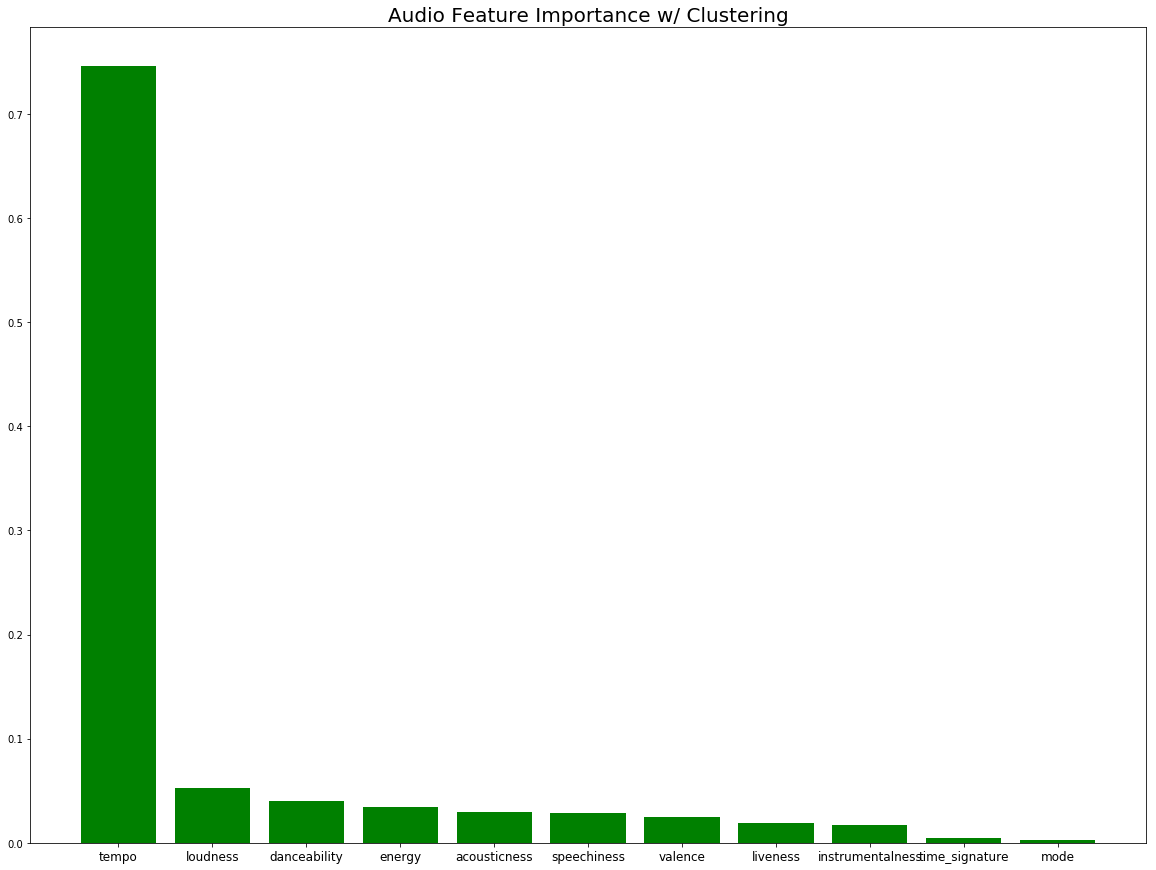

In [31]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance w/ Clustering', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

In [39]:
tempo_cluster =([(df[df['predicted'] == 0]['tempo'].min(),df[df['predicted'] == 0]['tempo'].max()),
 (df[df['predicted'] == 1]['tempo'].min(), df[df['predicted'] == 1]['tempo'].max()),
 (df[df['predicted'] == 2]['tempo'].min(), df[df['predicted'] == 2]['tempo'].max()),
 (df[df['predicted'] == 3]['tempo'].min(), df[df['predicted'] == 3]['tempo'].max()),
 (df[df['predicted'] == 4]['tempo'].min(), df[df['predicted'] == 4]['tempo'].max()),
 (df[df['predicted'] == 5]['tempo'].min(), df[df['predicted'] == 5]['tempo'].max()),
 (df[df['predicted'] == 6]['tempo'].min(), df[df['predicted'] == 6]['tempo'].max()),
 (df[df['predicted'] == 7]['tempo'].min(), df[df['predicted'] == 7]['tempo'].max()),
 (df[df['predicted'] == 8]['tempo'].min(), df[df['predicted'] == 8]['tempo'].max()),
 (df[df['predicted'] == 9]['tempo'].min(), df[df['predicted'] == 9]['tempo'].max()),
 (df[df['predicted'] == 10]['tempo'].min(), df[df['predicted'] == 10]['tempo'].max()),
 (df[df['predicted'] == 11]['tempo'].min(), df[df['predicted'] == 11]['tempo'].max())])

In [40]:
print(tempo_cluster)

[(146.496, 163.168), (87.838, 103.492), (79.36399999999998, 110.145), (183.641, 232.12400000000002), (35.946999999999996, 79.63600000000002), (116.887, 131.81799999999998), (0.0, 0.0), (110.272, 147.871), (102.39299999999999, 118.01299999999999), (64.01899999999999, 88.554), (162.671, 183.706), (131.717, 146.656)]


In [34]:
tempo_count = [(df['tempo'].between(tempo_cluster[0][0],tempo_cluster[0][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[1][0],tempo_cluster[1][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[2][0],tempo_cluster[2][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[3][0],tempo_cluster[3][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[4][0],tempo_cluster[4][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[5][0],tempo_cluster[5][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[6][0],tempo_cluster[6][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[7][0],tempo_cluster[7][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[8][0],tempo_cluster[8][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[9][0],tempo_cluster[9][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[10][0],tempo_cluster[10][1], inclusive=True)).sum(),
               (df['tempo'].between(tempo_cluster[11][0],tempo_cluster[11][1], inclusive=True)).sum()]


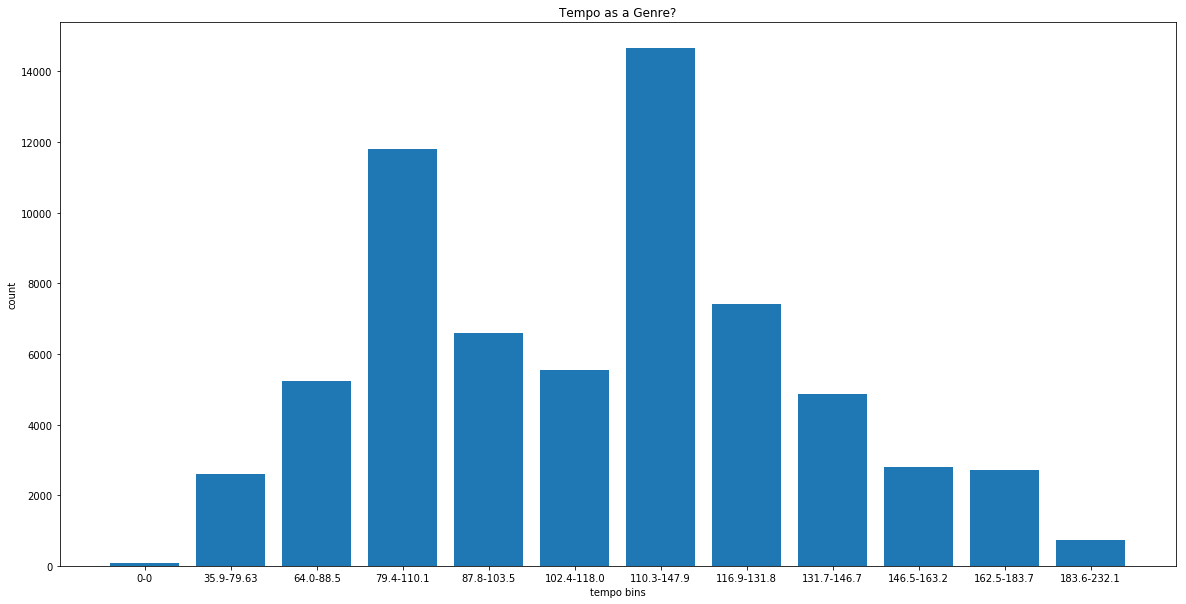

In [70]:
x = ['0-0', '35.9-79.63', '64.0-88.5', '79.4-110.1','87.8-103.5','102.4-118.0','110.3-147.9','116.9-131.8','131.7-146.7',
'146.5-163.2','162.5-183.7','183.6-232.1']
plt.figure(figsize=(20,10))
plt.bar(x, tempo_count)
plt.xlabel('tempo bins')
plt.ylabel('count')
plt.title('Tempo as a Genre?')
plt.show();

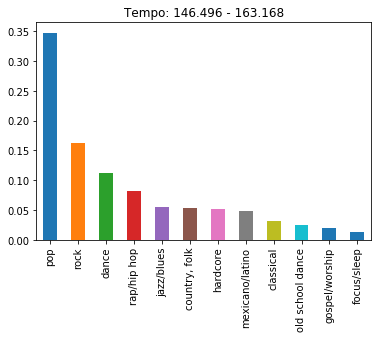

In [50]:
df[df.predicted == 0]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 146.496 - 163.168');

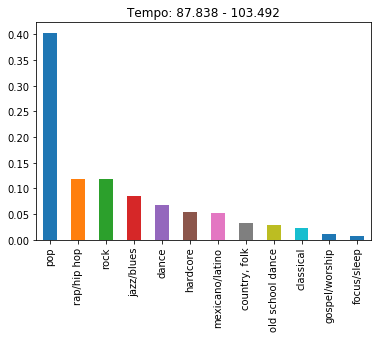

In [55]:
df[df.predicted == 1]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 87.838 - 103.492');

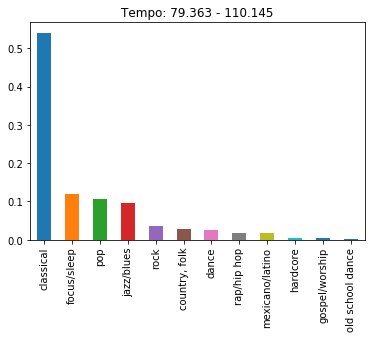

In [54]:
df[df.predicted == 2]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 79.363 - 110.145');

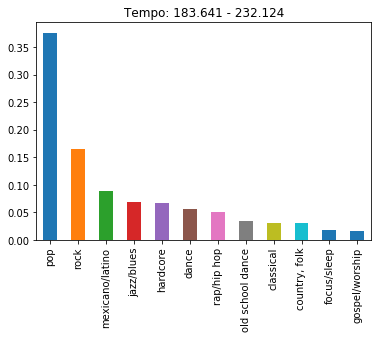

In [57]:
df[df.predicted == 3]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 183.641 - 232.124');

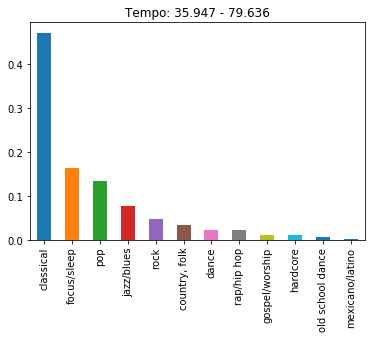

In [59]:
df[df.predicted == 4]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 35.947 - 79.636');

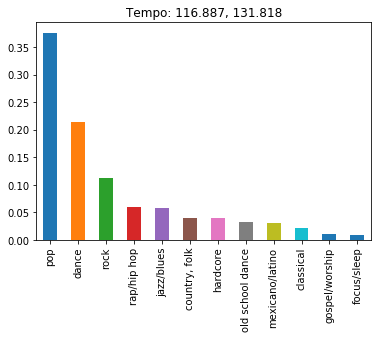

In [60]:
df[df.predicted == 5]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 116.887, 131.818');

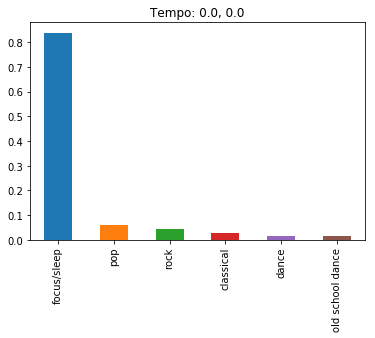

In [61]:
df[df.predicted == 6]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 0.0, 0.0');

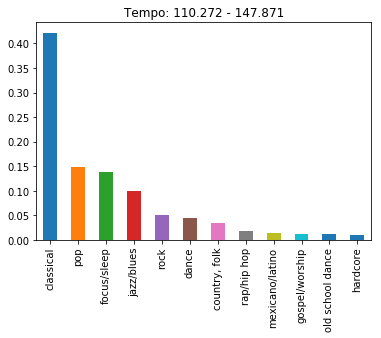

In [62]:
df[df.predicted == 7]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 110.272 - 147.871');

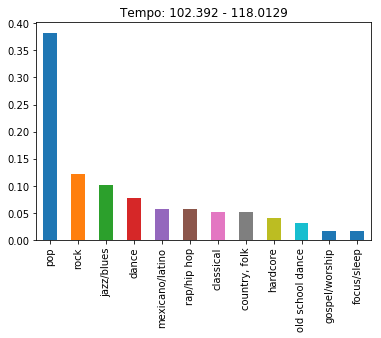

In [63]:
df[df.predicted == 8]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 102.392 - 118.0129');

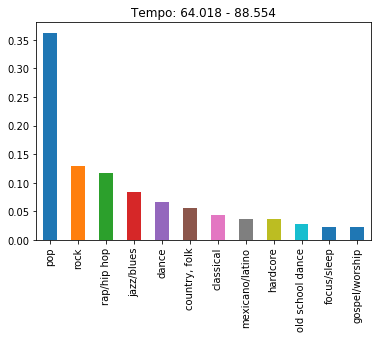

In [65]:
df[df.predicted == 9]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 64.018 - 88.554');

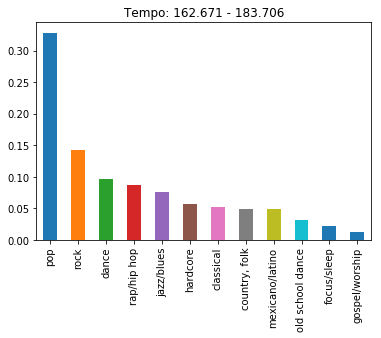

In [67]:
df[df.predicted == 10]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 162.671 - 183.706');

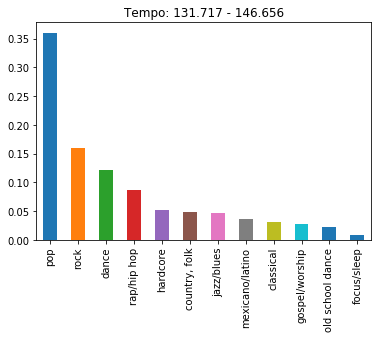

In [69]:
df[df.predicted == 11]['target'].value_counts(normalize=True).plot(kind='bar', title= 'Tempo: 131.717 - 146.656');

# Remove Tempo and Cluster

In [109]:
df.head(5)

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target,predicted
0,0.5710,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.001070,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677,old school dance,11
1,0.1220,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.000000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235,rock,9
2,0.2290,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.548000,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563,pop,9
3,0.0375,2,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,0.703,0.696,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",0.000006,11,0.274,-5.482,1,98,0.0529,121.969,4,5SxkdsY1ufZzoq9iXceLw9,no tears left to cry,0.366,pop,5
4,0.8830,3,spotify:artist:15UsOTVnJzReFVN1VCnxy4,0.610,0.258,"['alternative metal', 'canadian metal', 'canad...",0.014500,11,0.103,-12.758,1,81,0.0331,127.080,4,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.164,pop,5


In [114]:
X = df[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness','time_signature', 'valence']]

In [115]:
km = KMeans(n_clusters=12, random_state=24)

In [116]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=24, tol=0.0001, verbose=0)

In [125]:
pd.Series(km.labels_).value_counts()

0     7486
7     6827
5     5331
4     4109
2     3750
8     2762
3     1669
10    1221
1      885
6      599
9      326
11      84
dtype: int64

In [126]:
df['predicted'] = km.labels_

In [127]:
y = df['predicted']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=24)

In [129]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=24)

In [130]:
rf = RandomForestClassifier(n_estimators = 100,max_features='sqrt', random_state=24)

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [132]:
rf.score(X_val, y_val)

0.9945222154595252

In [133]:
rf.score(X_test, y_test)

0.9942941914869337

In [134]:
y_hat_no_tempo = rf.predict(X_test)

In [135]:
print(classification_report(y_test, y_hat_cluster, target_names=['0','1','2','3','4','5','6','7','8','9','10','11']))

             precision    recall  f1-score   support

          0       0.22      0.08      0.12      1872
          1       0.02      0.14      0.04       221
          2       0.12      0.04      0.05       938
          3       0.06      0.02      0.03       417
          4       0.15      0.04      0.06      1027
          5       0.15      0.19      0.17      1333
          6       0.00      0.00      0.00       150
          7       0.23      0.04      0.06      1707
          8       0.07      0.12      0.09       691
          9       0.01      0.10      0.02        81
         10       0.04      0.09      0.06       305
         11       0.00      0.24      0.01        21

avg / total       0.16      0.08      0.09      8763



In [136]:
s = sorted(list(zip( rf.feature_importances_, X.columns)),reverse=True)

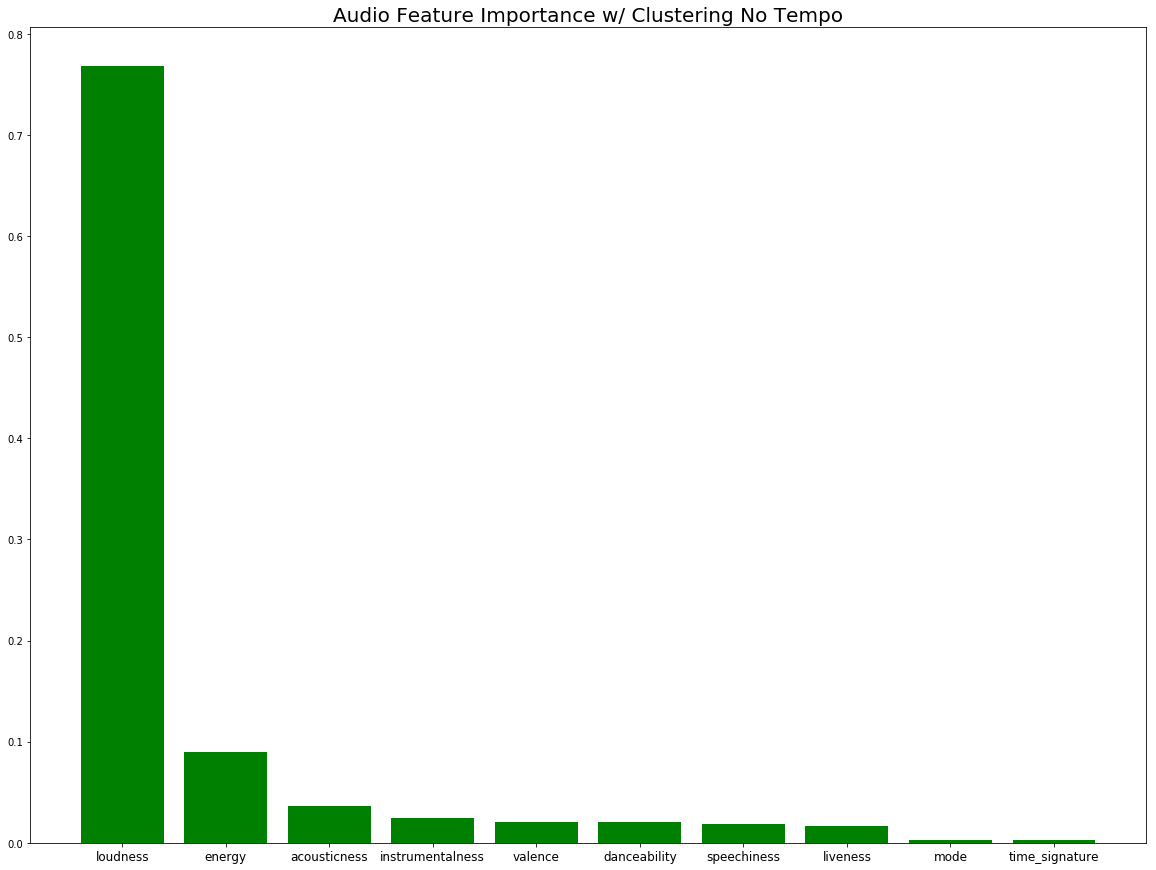

In [137]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance w/ Clustering No Tempo', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

# No loudness, mode, time_signature

In [84]:
#Everything on same scale between 0 to 1
df.head(5)

,acousticness,artist_name,artist_uri,danceability,energy,genre,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_id,track_name,valence,target,predicted
0,0.5710,1:43,spotify:artist:39EHxSQAIaWusRqSI9xoyF,0.641,0.665,"['classic opm', 'opm']",0.001070,11,0.159,-7.839,1,41,0.0263,138.017,4,1vPk6ZTflnvm8LgtXzPDrT,Sa Isang Sulyap Mo,0.677,old school dance,11
1,0.1220,2 AM,spotify:artist:17lzZA2AlOHwCwFALHttmp,0.796,0.513,"['alternative emo', 'emo', 'modern rock']",0.000000,11,0.150,-7.140,0,74,0.4520,75.018,4,1nX9KhK3Fff27SnrIor2Yb,4 AM,0.235,rock,9
2,0.2290,2:54,spotify:artist:3TUmwNx3l8S2nCoGKqIhjA,0.792,0.256,['metropopolis'],0.548000,11,0.350,-12.525,1,52,0.1910,87.774,4,44L7aDHaRzb9pMWEZjSH8u,Train to Skaville,0.563,pop,9
3,0.0375,2,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,0.703,0.696,"['hip hop', 'pop', 'pop rap', 'rap', 'southern...",0.000006,11,0.274,-5.482,1,98,0.0529,121.969,4,5SxkdsY1ufZzoq9iXceLw9,no tears left to cry,0.366,pop,5
4,0.8830,3,spotify:artist:15UsOTVnJzReFVN1VCnxy4,0.610,0.258,"['alternative metal', 'canadian metal', 'canad...",0.014500,11,0.103,-12.758,1,81,0.0331,127.080,4,2oe6dDthgthqUkfL3czpEd,"ALONE, PART 3",0.164,pop,5


In [85]:
X = df[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'speechiness', 'valence']]


In [86]:
km = KMeans(n_clusters=12, random_state=24)

In [87]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=24, tol=0.0001, verbose=0)

In [88]:
pd.Series(km.labels_).value_counts()

11    5902
2     4824
0     4106
5     3226
10    3181
1     3164
9     2562
3     2444
6     1773
4     1418
7     1351
8     1098
dtype: int64

In [89]:
df['predicted'] = km.labels_

In [93]:
5902/len(X)

0.16839282147850151

In [29]:
y = df['predicted']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=24)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=24)

In [32]:
rf = RandomForestClassifier(n_estimators = 100,max_features='sqrt', random_state=24)

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [34]:
rf.score(X_val, y_val)

0.9613511868533171

In [35]:
rf.score(X_test, y_test)

0.9591464110464453

In [36]:
y_hat_zero_to_one = rf.predict(X_test)

In [39]:
print(classification_report(y_test, y_hat_zero_to_one, target_names=['0','1','2','3','4','5','6','7','8','9','10','11']))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1027
          1       0.95      0.94      0.95       791
          2       0.96      0.96      0.96      1206
          3       0.98      0.99      0.99       611
          4       0.97      0.96      0.97       354
          5       0.94      0.94      0.94       807
          6       0.98      0.97      0.98       443
          7       0.96      0.94      0.95       338
          8       0.95      0.95      0.95       274
          9       0.97      0.98      0.97       641
         10       0.95      0.97      0.96       795
         11       0.97      0.97      0.97      1476

avg / total       0.96      0.96      0.96      8763



In [40]:
s = sorted(list(zip( rf.feature_importances_, X.columns)),reverse=True)

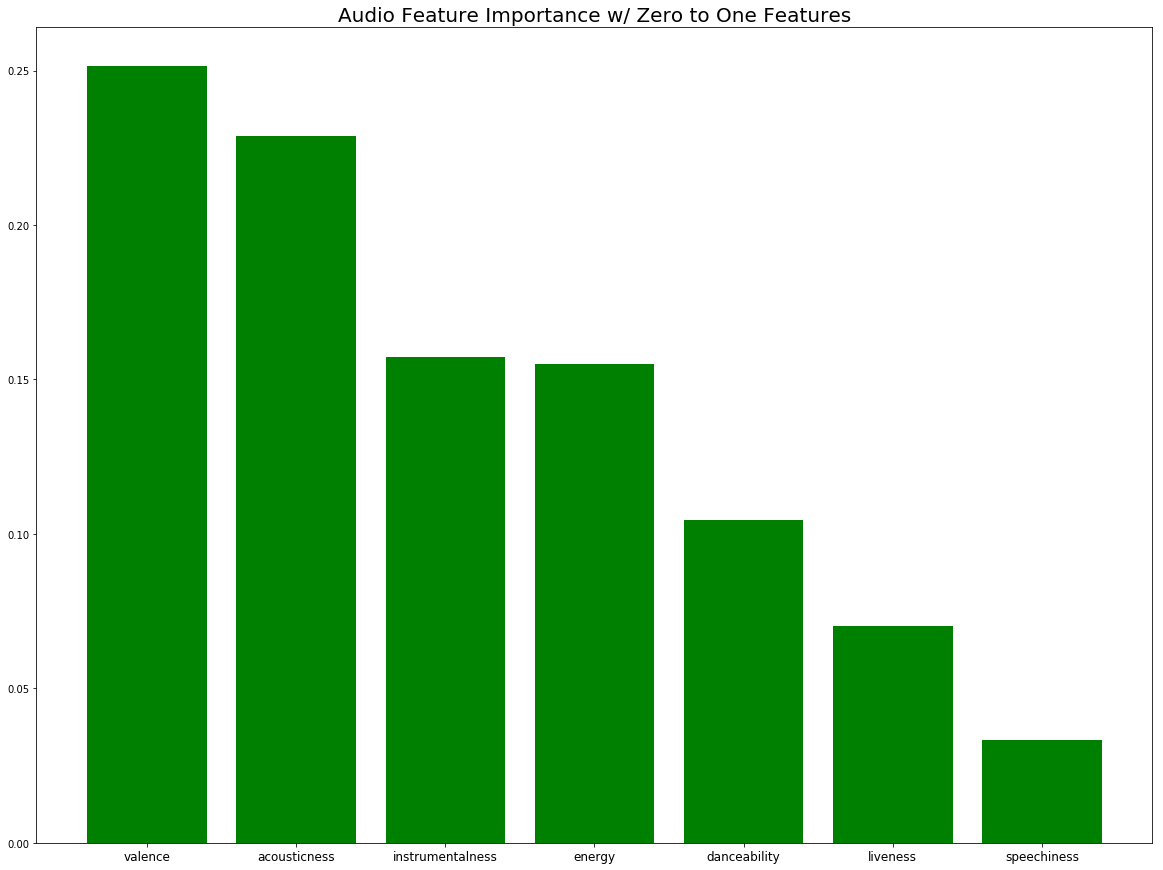

In [41]:
plt.figure(figsize=(20, 15))
plt.title('Audio Feature Importance w/ Zero to One Features', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='g')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

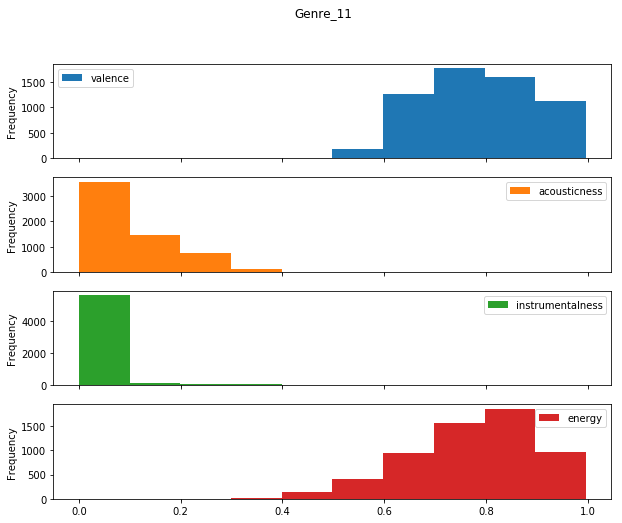

In [133]:
df[df['predicted'] == 11][['valence','acousticness','instrumentalness', 'energy']].plot(kind='hist', subplots=True, title='Genre_11',figsize=(10,8));


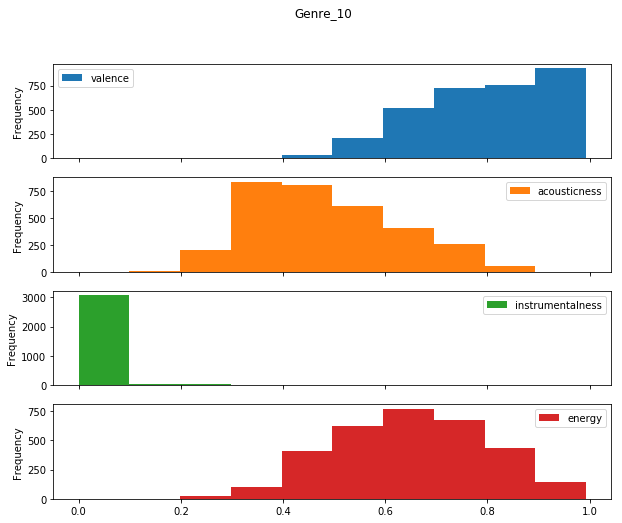

In [134]:
df[df['predicted'] == 10][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_10',figsize=(10,8));


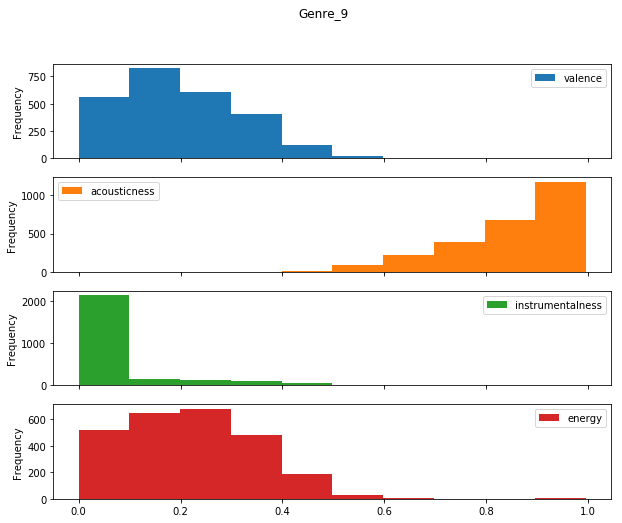

In [136]:
df[df['predicted'] == 9][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_9',figsize=(10,8));


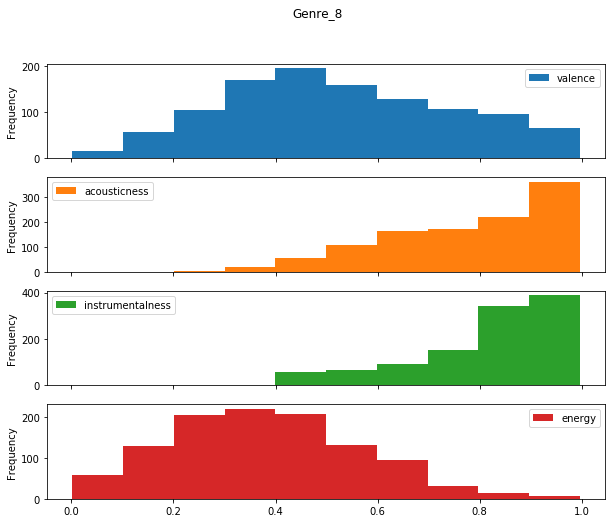

In [137]:
df[df['predicted'] == 8][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_8',figsize=(10,8));

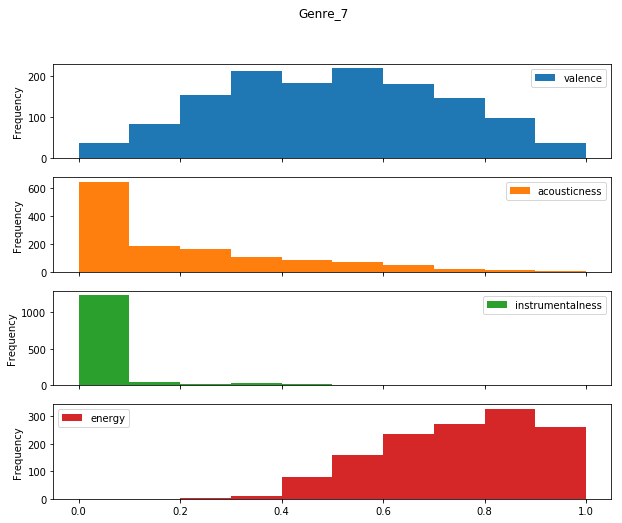

In [138]:
df[df['predicted'] == 7][['valence','acousticness', 'instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_7',figsize=(10,8));

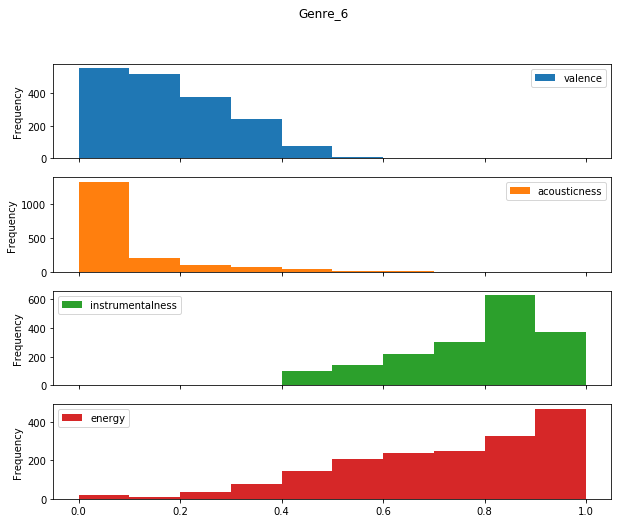

In [140]:
df[df['predicted'] == 6][['valence','acousticness', 'instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_6',figsize=(10,8));

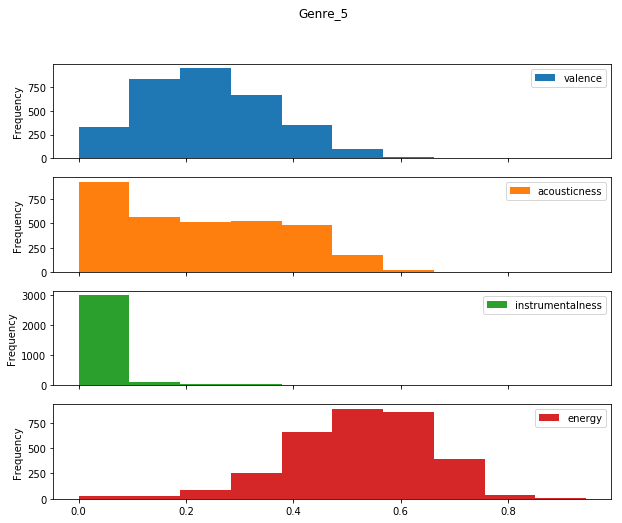

In [141]:
df[df['predicted'] == 5][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_5',figsize=(10,8));

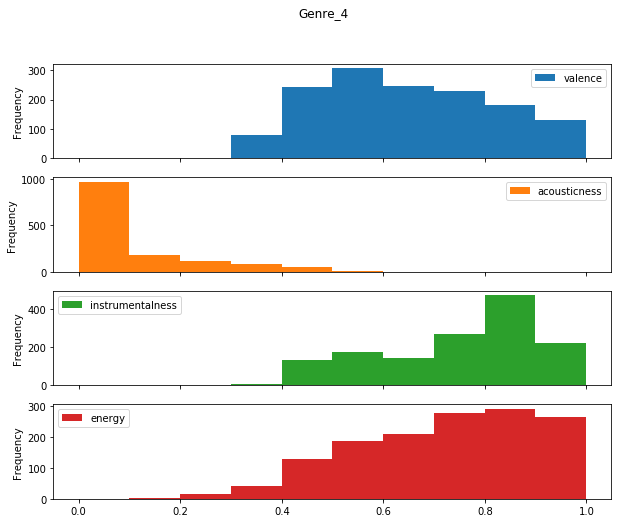

In [142]:
df[df['predicted'] == 4][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_4',figsize=(10,8));

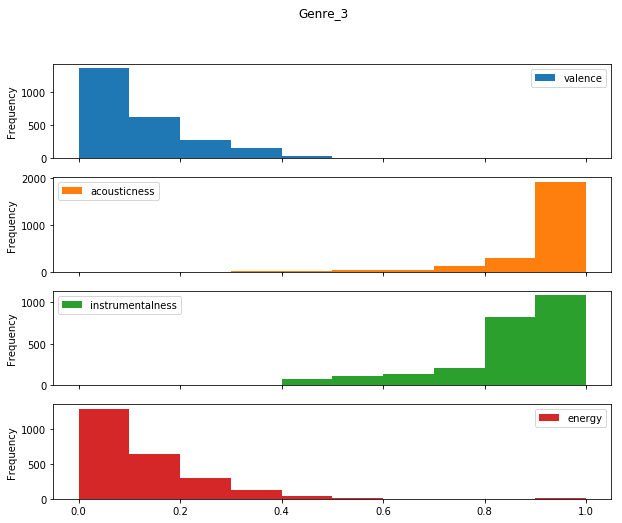

In [143]:
df[df['predicted'] == 3][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_3',figsize=(10,8));

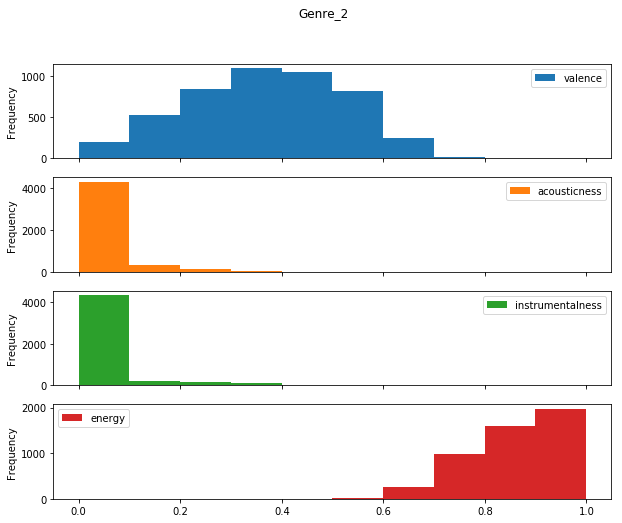

In [144]:
df[df['predicted'] == 2][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_2',figsize=(10,8));

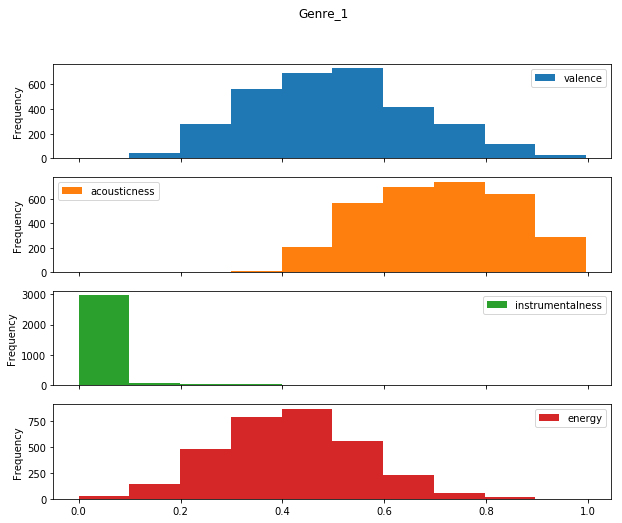

In [145]:
df[df['predicted'] == 1][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_1',figsize=(10,8));

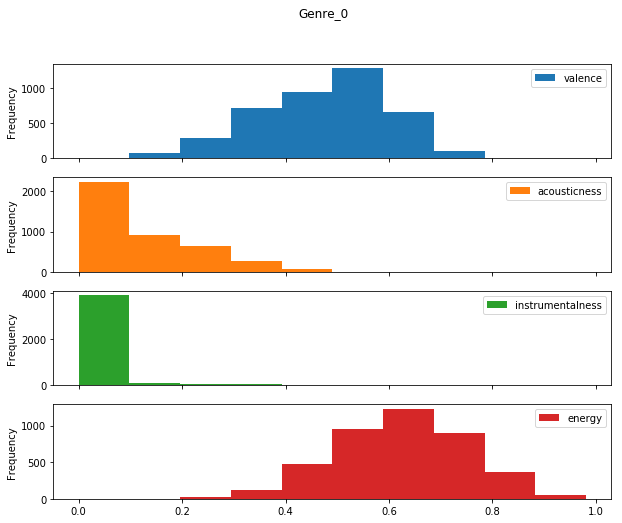

In [157]:
df[df['predicted'] == 0][['valence','acousticness','instrumentalness','energy']].plot(kind='hist', subplots=True, title='Genre_0',figsize=(10,8));

In [95]:
#,8,6,4,3
df[df['predicted'] == 8]['target'].value_counts(normalize=True)

classical           0.215847
jazz/blues          0.215847
pop                 0.171220
rap/hip hop         0.091075
dance               0.083789
focus/sleep         0.063752
rock                0.057377
country, folk       0.056466
mexicano/latino     0.020036
hardcore            0.011840
gospel/worship      0.006375
old school dance    0.006375
Name: target, dtype: float64

In [167]:
df[df['predicted'] == 6]['target'].value_counts(normalize=True)

dance               0.350818
pop                 0.153976
hardcore            0.129724
rock                0.108855
focus/sleep         0.080090
classical           0.078398
jazz/blues          0.049633
rap/hip hop         0.031585
country, folk       0.009024
old school dance    0.006768
mexicano/latino     0.001128
Name: target, dtype: float64

In [168]:
df[df['predicted'] == 4]['target'].value_counts(normalize=True)

dance               0.337094
pop                 0.237659
jazz/blues          0.126234
rock                0.089563
rap/hip hop         0.047955
old school dance    0.040903
classical           0.035966
hardcore            0.034556
mexicano/latino     0.021157
country, folk       0.016220
focus/sleep         0.011283
gospel/worship      0.001410
Name: target, dtype: float64

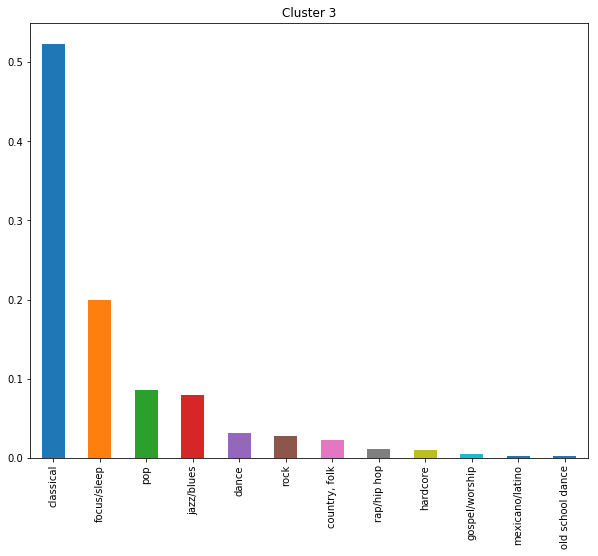

In [178]:
df[df['predicted'] == 3]['target'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8), title='Cluster 3');

In [176]:
df[df['predicted'] == 3][['artist_name', 'genre', 'track_name', 'target','predicted']].head(10)

,artist_name,genre,track_name,target,predicted
143,4 Night Flames,['deep eurodance'],Night of Fire & Flames,dance,3
154,4-Deep,['dirty texas rap'],Deep Theta 4 Hz,rap/hip hop,3
176,65daysofstatic,"['post rock', 'sheffield indie']",Hypersleep,pop,3
195,8 Bit Weapon,"['chiptune', 'nintendocore']",Mega Man 3 - Get a Weapon,classical,3
223,A Dancing Beggar,['compositional ambient'],Creeping into Dusk,focus/sleep,3
270,A Winged Victory for the Sullen,"['ambient', 'compositional ambient', 'drift', ...",Steep Hills of Vicodin Tears,rock,3
280,A-WA,['israeli indie'],"Klarinettenkonzert A-Dur, K. 622: 2. Adagio (J...",pop,3
308,Aaron Copland,"['classical', 'early modern classical']",Fanfare for the Common Man,classical,3
310,Aaron Flemming,['focus'],Before I Disappear,focus/sleep,3
332,Aaron Zigman,['soundtrack'],Steve's Theme,classical,3


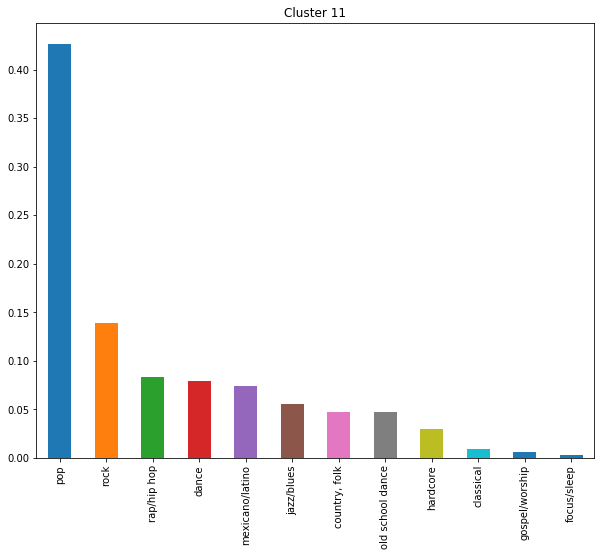

In [179]:
df[df['predicted'] == 11]['target'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8), title='Cluster 11');

In [181]:
df[df['predicted'] == 11][['artist_name', 'genre', 'track_name', 'target','predicted']].head(10)

,artist_name,genre,track_name,target,predicted
17,? & The Mysterians,"['bubblegum pop', 'classic garage rock', 'frea...",96 Tears,pop,11
18,¿Téo?,['dwn trap'],Rolex,rap/hip hop,11
21,"""Weird Al"" Yankovic","['antiviral pop', 'comedy rock', 'comic']","White & Nerdy (Parody of ""Ridin'"" by Chamillio...",pop,11
24,(dc),"['album rock', 'australian rock', 'hard rock',...",Back In Black,rock,11
28,[.que],['trap music'],Que Va,rap/hip hop,11
29,[Alexandros],"['anime', 'j-pop', 'j-rock']",Бродяга (feat. Alexandros Tsopozidis),pop,11
34,*NSYNC,"['boy band', 'dance pop', 'europop', 'pop']",Bye Bye Bye,pop,11
37,#TocoParaVos,['cumbia pop'],Hasta la luna,pop,11
38,+,['cumbia pop'],Hasta la luna,pop,11
47,$Wagg Dinero,['drill'],Have It All,rap/hip hop,11
